## Step 1: importing packages and datasets

In [3]:
# Import packages
import os
# Standard operational package imports
import numpy as np
import pandas as pd

# Important imports for modeling and evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

# This is the classifier
import xgboost
from xgboost import XGBClassifier

# This is the function that helps plot feature importance 
from xgboost import plot_importance

# Visualization package imports
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# loading in the dataframe
# the data is stored within csv files for each complete season played. The data will be concatenated into one csv which will then be read in as the final csv used in this analysis
complete_data = pd.DataFrame()

files = [file for file in os.listdir(r'C:\Users\liamf\Desktop\data analytics\python\football_odds')]

#for file in files:
    #print(file)
    
for file in files:
    df = pd.read_csv(r'C:\Users\liamf\Desktop\data analytics\python\football_odds\\'+file)
    complete_data = pd.concat([complete_data, df])
    
#complete_data.head(10)

complete_data.to_csv(r"C:\Users\liamf\Desktop\data analytics\python\football_odds\complete_data_file.csv")

In [2]:
#reading in the final dataset and saving it to the variable "football"
football = pd.read_csv(r"C:\Users\liamf\Desktop\data analytics\python\football_odds\complete_data_file.csv")

In [3]:
#read in an additional dataset that contains useful features

football_plus = pd.read_csv(r"C:\Users\liamf\Desktop\data analytics\python\final_dataset_with_odds.csv")

In [8]:
# ensuring that all column headers are visible
pd.set_option('display.max_columns', None)

In [4]:
#observing whether the import was successful
football.head(5)

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,GBH,GBD,GBA,IWH,IWD,IWA,LBH,LBD,LBA,SBH,SBD,SBA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,BSH,BSD,BSA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSH,PSD,PSA,PSCH,PSCD,PSCA,Time,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA,B365>2.5,B365<2.5,P>2.5,P<2.5,Max>2.5,Max<2.5,Avg>2.5,Avg<2.5,AHh,B365AHH,B365AHA,PAHH,PAHA,MaxAHH,MaxAHA,AvgAHH,AvgAHA,B365CH,B365CD,B365CA,BWCH,BWCD,BWCA,IWCH,IWCD,IWCA,WHCH,WHCD,WHCA,VCCH,VCCD,VCCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,0,E0,13/08/11,Blackburn,Wolves,1.0,2.0,A,1.0,1.0,D,K Friend,16.0,13.0,8.0,4.0,14.0,10.0,12.0,6.0,4.0,2.0,0.0,0.0,2.20,3.20,3.5,2.00,3.30,3.60,2.10,3.20,3.5,2.0,3.3,3.3,2.00,3.40,3.75,2.0,3.25,3.40,2.20,3.10,3.50,2.05,3.40,3.60,2.15,3.4,3.60,2.00,3.40,3.60,37.0,2.22,2.13,3.43,3.29,3.75,3.52,37.0,2.06,1.96,1.89,1.82,18.0,-0.50,2.20,2.14,1.78,1.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,E0,13/08/11,Fulham,Aston Villa,0.0,0.0,D,0.0,0.0,D,L Mason,13.0,7.0,9.0,1.0,10.0,18.0,2.0,3.0,2.0,4.0,0.0,0.0,2.20,3.20,3.5,2.05,3.30,3.45,2.10,3.20,3.5,2.2,3.2,3.0,2.20,3.30,3.30,2.1,3.20,3.20,2.20,3.20,3.40,2.10,3.30,3.50,2.15,3.3,3.75,2.10,3.25,3.40,38.0,2.20,2.12,3.43,3.28,3.86,3.53,34.0,2.21,2.11,1.77,1.69,21.0,-0.25,1.83,1.80,2.14,2.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,E0,13/08/11,Liverpool,Sunderland,1.0,1.0,D,1.0,0.0,H,P Dowd,11.0,15.0,4.0,6.0,17.0,12.0,6.0,3.0,4.0,4.0,0.0,0.0,1.57,3.60,7.0,1.45,3.85,7.50,1.50,3.75,7.0,1.4,4.1,7.0,1.50,3.75,7.50,1.4,4.00,7.50,1.57,3.75,6.50,1.50,3.90,7.50,1.53,4.0,7.50,1.50,3.75,7.00,37.0,1.57,1.50,4.20,3.92,8.04,7.30,37.0,1.92,1.85,2.01,1.92,21.0,-1.00,1.92,1.88,2.02,1.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,E0,13/08/11,Newcastle,Arsenal,0.0,0.0,D,0.0,0.0,D,P Walton,6.0,9.0,1.0,4.0,9.0,11.0,2.0,5.0,3.0,5.0,0.0,1.0,3.75,3.25,2.1,3.65,3.25,2.00,3.75,3.20,2.0,3.7,3.3,1.9,3.75,3.40,2.00,3.4,3.40,1.95,3.75,3.20,2.05,4.00,3.50,1.91,3.80,3.4,2.10,3.75,3.25,2.05,36.0,4.00,3.68,3.52,3.35,2.15,2.05,34.0,1.89,1.80,2.10,1.98,20.0,0.50,1.84,1.79,2.16,2.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,E0,13/08/11,QPR,Bolton,0.0,4.0,A,0.0,1.0,A,M Atkinson,13.0,13.0,7.0,7.0,9.0,16.0,3.0,2.0,1.0,2.0,1.0,0.0,2.40,3.25,3.0,2.25,3.25,3.05,2.30,3.20,3.0,2.3,3.2,2.8,2.38,3.25,3.00,2.3,3.20,2.80,2.40,3.10,3.10,2.30,3.25,3.20,2.38,3.3,3.30,2.30,3.25,3.10,37.0,2.40,2.30,3.40,3.26,3.40,3.14,34.0,2.27,2.16,1.73,1.66,19.0,-0.25,2.00,1.95,1.98,1.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
#observing whether the import was successful
football_plus.head(5)

,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,HM2,HM3,HM4,HM5,AM1,AM2,AM3,AM4,AM5,HomeTeamLP,AwayTeamLP,MW,HTFormPtsStr,ATFormPtsStr,HTFormPts,ATFormPts,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP,B365H,B365D,B365A,IWH,IWD,IWA,LBH,LBD,LBA,WHH,WHD,WHA
0,0,2002-08-17,Blackburn,Sunderland,0,0,NH,0,0,0,0,0.0,0.0,M,M,M,M,M,M,M,M,M,M,10.0,17.0,1.0,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,-7.0,1.727,3.25,4.333,1.8,3.1,3.8,1.615,3.25,5.00,1.66,3.3,4.50
1,1,2002-08-17,Charlton,Chelsea,2,3,NH,0,0,0,0,0.0,0.0,M,M,M,M,M,M,M,M,M,M,14.0,6.0,1.0,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,8.0,2.800,3.25,2.200,2.9,3.0,2.2,2.800,3.20,2.20,2.75,3.1,2.30
2,2,2002-08-17,Everton,Tottenham,2,2,NH,0,0,0,0,0.0,0.0,M,M,M,M,M,M,M,M,M,M,15.0,9.0,1.0,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,6.0,2.250,3.25,2.750,2.3,3.0,2.7,2.250,3.20,2.75,2.30,3.1,2.75
3,3,2002-08-17,Fulham,Bolton,4,1,H,0,0,0,0,0.0,0.0,M,M,M,M,M,M,M,M,M,M,13.0,16.0,1.0,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,-3.0,1.727,3.25,4.333,1.8,3.1,3.8,1.833,3.20,3.75,1.72,3.2,4.33
4,4,2002-08-17,Leeds,Man City,3,0,H,0,0,0,0,0.0,0.0,M,M,M,M,M,M,M,M,M,M,5.0,18.0,1.0,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,-13.0,1.667,3.40,4.500,1.7,3.2,4.2,1.615,3.50,4.50,1.66,3.3,4.50


## Step 2. Data Exploration (Initial EDA and data cleaning)

In [5]:
#Renaming the date column in the football plus column so it can be used as the date in the final dataset as all its dates are in the same format

football_plus.rename(columns = {'Date':'date'}, inplace = True)

In [7]:
#removing possible spaces after column names

football.rename(columns=lambda x: x.strip(), inplace=True)

football_plus.rename(columns=lambda x: x.strip(), inplace=True)

In [8]:
football.shape

(3605, 140)

In [9]:
# adding columns from the football_plus dataset to the football dataset

# Select only the common columns and the specific columns you want to merge
columns_to_merge = ['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'B365H', 'B365D', 'B365A', 'IWA', 'IWH', 'IWD','WHH', 'WHA', 'WHD','HTFormPtsStr', 'ATFormPtsStr', 'date']

# Left join based on common columns
merged_df = pd.merge(football, football_plus[columns_to_merge], on=['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'B365H', 'B365D', 'B365A', 'IWA', 'IWH', 'IWD','WHH', 'WHA', 'WHD'], how='left')


In [10]:
merged_df.shape

(3605, 143)

In [11]:
merged_df.tail(5)

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,GBH,GBD,GBA,IWH,IWD,IWA,LBH,LBD,LBA,SBH,SBD,SBA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,BSH,BSD,BSA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSH,PSD,PSA,PSCH,PSCD,PSCA,Time,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA,B365>2.5,B365<2.5,P>2.5,P<2.5,Max>2.5,Max<2.5,Avg>2.5,Avg<2.5,AHh,B365AHH,B365AHA,PAHH,PAHA,MaxAHH,MaxAHA,AvgAHH,AvgAHA,B365CH,B365CD,B365CA,BWCH,BWCD,BWCA,IWCH,IWCD,IWCA,WHCH,WHCD,WHCA,VCCH,VCCD,VCCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,HTFormPtsStr,ATFormPtsStr,date
3600,179,E0,19/01/2021,West Ham,West Brom,2.0,1.0,H,1.0,0.0,H,G Scott,14.0,6.0,6.0,2.0,10.0,10.0,3.0,1.0,0.0,1.0,0.0,0.0,1.57,4.20,5.50,1.57,4.00,6.00,NaN,NaN,NaN,1.60,3.90,5.70,NaN,NaN,NaN,NaN,NaN,NaN,1.57,3.9,6.50,NaN,NaN,NaN,1.55,4.0,6.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.58,4.23,6.35,1.54,4.27,7.01,18:00,1.62,4.26,6.59,1.58,4.08,6.09,1.90,1.90,1.92,1.99,1.94,2.00,1.89,1.93,-1.00,1.98,1.92,2.00,1.93,2.03,1.94,2.00,1.87,1.53,4.2,6.0,1.53,4.20,6.25,1.57,4.1,5.80,1.55,4.00,6.50,1.50,4.2,6.50,1.57,4.47,7.40,1.53,4.22,6.46,1.72,2.10,1.79,2.12,1.84,2.26,1.76,2.08,-1.00,1.88,2.02,1.90,2.03,1.94,2.06,1.89,1.98,NaN,NaN,NaN
3601,180,E0,19/01/2021,Leicester,Chelsea,2.0,0.0,H,2.0,0.0,H,C Pawson,8.0,9.0,6.0,5.0,7.0,16.0,6.0,3.0,1.0,3.0,0.0,0.0,2.87,3.40,2.45,2.85,3.40,2.45,NaN,NaN,NaN,2.85,3.35,2.45,NaN,NaN,NaN,NaN,NaN,NaN,3.00,3.4,2.40,NaN,NaN,NaN,2.80,3.4,2.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.92,3.49,2.55,2.88,3.48,2.58,20:15,3.04,3.55,2.58,2.90,3.41,2.49,1.90,1.90,1.90,2.00,1.96,2.03,1.89,1.94,0.00,2.09,1.81,2.11,1.83,2.16,1.85,2.08,1.81,2.75,3.4,2.5,2.80,3.40,2.50,2.80,3.4,2.50,2.75,3.40,2.55,2.75,3.4,2.55,3.00,3.65,2.69,2.80,3.43,2.53,1.80,2.00,1.88,2.03,1.89,2.15,1.81,2.01,0.00,2.05,1.85,2.08,1.85,2.09,1.92,2.03,1.84,NaN,NaN,NaN
3602,181,E0,20/01/2021,Man City,Aston Villa,2.0,0.0,H,0.0,0.0,D,J Moss,28.0,11.0,9.0,4.0,10.0,9.0,16.0,2.0,0.0,2.0,0.0,0.0,1.22,6.50,12.00,1.25,6.25,11.50,NaN,NaN,NaN,1.27,6.00,10.00,NaN,NaN,NaN,NaN,NaN,NaN,1.25,6.0,12.00,NaN,NaN,NaN,1.25,6.0,12.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.24,6.10,11.61,1.33,5.95,9.55,18:00,1.29,6.75,13.00,1.25,6.21,11.36,1.44,2.75,1.47,2.65,1.53,2.75,1.48,2.65,-1.75,1.95,1.95,1.93,1.91,1.98,2.00,1.92,1.94,1.28,6.0,10.0,1.30,5.75,9.50,1.33,5.5,8.00,1.30,5.50,10.00,1.30,5.5,10.00,1.35,6.20,11.00,1.31,5.79,9.32,1.50,2.62,1.49,2.76,1.55,2.82,1.49,2.62,-1.50,1.98,1.95,1.97,1.95,2.00,2.07,1.92,1.95,NaN,NaN,NaN
3603,182,E0,20/01/2021,Fulham,Man United,1.0,2.0,A,1.0,1.0,D,M Atkinson,12.0,15.0,5.0,5.0,6.0,10.0,2.0,8.0,3.0,1.0,0.0,0.0,6.00,4.33,1.53,5.75,4.33,1.55,NaN,NaN,NaN,5.80,4.25,1.55,NaN,NaN,NaN,NaN,NaN,NaN,6.50,4.2,1.53,NaN,NaN,NaN,6.50,4.2,1.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.32,4.41,1.56,5.49,4.18,1.66,20:15,6.50,4.54,1.59,6.05,4.31,1.55,1.72,2.10,1.78,2.14,1.80,2.21,1.73,2.13,1.00,1.96,1.94,1.96,1.96,1.99,2.00,1.94,1.92,5.50,4.0,1.6,5.50,4.25,1.57,5.25,4.1,1.63,5.80,4.00,1.60,5.50,4.0,1.62,6.05,4.35,1.67,5.44,4.10,1.63,1.72,2.10,1.76,2.16,1.76,2.26,1.71,2.15,1.00,1.75,2.05,1.79,2.15,1.90,2.16,1.80,2.09,NaN,NaN,NaN
3604,183,E0,21/01/2021,Liverpool,Burnley,0.0,1.0,A,0.0,0.0,D,M Dean,27.0,6.0,6.0,4.0,11.0,8.0,12.0,0.0,2.0,1.0,0.0,0.0,1.18,7.50,15.00,1.17,7.50,15.50,NaN,NaN,NaN,1.21,6.60,13.50,NaN,NaN,NaN,NaN,NaN,NaN,1.18,7.0,17.00,NaN,NaN,NaN,1.18,7.0,17.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.21,7.24,15.81,1.35,5.34,9.48,20:00,1.23,8.00,17.75,1.20,7.05,14.89,1.53,2.50,1.53,2.64,1.56,2.65,1.52,2.53,-2.00,2.05,1

In [12]:
#selecting columns to use 
selected_columns = ['date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTR', 'HTHG', 'HTAG', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'HTFormPtsStr', 'ATFormPtsStr']

selected_df = merged_df[selected_columns]

In [13]:
# display selected columns
selected_df.head(5)

,date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTR,HTHG,HTAG,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,HTFormPtsStr,ATFormPtsStr
0,2011-08-13,Blackburn,Wolves,1.0,2.0,A,D,1.0,1.0,K Friend,16.0,13.0,8.0,4.0,14.0,10.0,12.0,6.0,4.0,2.0,0.0,0.0,2.20,3.20,3.5,MMMMM,MMMMM
1,2011-08-13,Fulham,Aston Villa,0.0,0.0,D,D,0.0,0.0,L Mason,13.0,7.0,9.0,1.0,10.0,18.0,2.0,3.0,2.0,4.0,0.0,0.0,2.20,3.20,3.5,MMMMM,MMMMM
2,2011-08-13,Liverpool,Sunderland,1.0,1.0,D,H,1.0,0.0,P Dowd,11.0,15.0,4.0,6.0,17.0,12.0,6.0,3.0,4.0,4.0,0.0,0.0,1.57,3.60,7.0,MMMMM,MMMMM
3,2011-08-13,Newcastle,Arsenal,0.0,0.0,D,D,0.0,0.0,P Walton,6.0,9.0,1.0,4.0,9.0,11.0,2.0,5.0,3.0,5.0,0.0,1.0,3.75,3.25,2.1,MMMMM,MMMMM
4,2011-08-13,QPR,Bolton,0.0,4.0,A,A,0.0,1.0,M Atkinson,13.0,13.0,7.0,7.0,9.0,16.0,3.0,2.0,1.0,2.0,1.0,0.0,2.40,3.25,3.0,MMMMM,MMMMM


In [14]:
selected_df.shape

(3605, 27)

In [15]:
#remove full row duplicates 
df_cleaned = selected_df.dropna(how='all')

In [16]:
df_cleaned.head(5)

,date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTR,HTHG,HTAG,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,HTFormPtsStr,ATFormPtsStr
0,2011-08-13,Blackburn,Wolves,1.0,2.0,A,D,1.0,1.0,K Friend,16.0,13.0,8.0,4.0,14.0,10.0,12.0,6.0,4.0,2.0,0.0,0.0,2.20,3.20,3.5,MMMMM,MMMMM
1,2011-08-13,Fulham,Aston Villa,0.0,0.0,D,D,0.0,0.0,L Mason,13.0,7.0,9.0,1.0,10.0,18.0,2.0,3.0,2.0,4.0,0.0,0.0,2.20,3.20,3.5,MMMMM,MMMMM
2,2011-08-13,Liverpool,Sunderland,1.0,1.0,D,H,1.0,0.0,P Dowd,11.0,15.0,4.0,6.0,17.0,12.0,6.0,3.0,4.0,4.0,0.0,0.0,1.57,3.60,7.0,MMMMM,MMMMM
3,2011-08-13,Newcastle,Arsenal,0.0,0.0,D,D,0.0,0.0,P Walton,6.0,9.0,1.0,4.0,9.0,11.0,2.0,5.0,3.0,5.0,0.0,1.0,3.75,3.25,2.1,MMMMM,MMMMM
4,2011-08-13,QPR,Bolton,0.0,4.0,A,A,0.0,1.0,M Atkinson,13.0,13.0,7.0,7.0,9.0,16.0,3.0,2.0,1.0,2.0,1.0,0.0,2.40,3.25,3.0,MMMMM,MMMMM


In [17]:
# formatting the Date_final column to datetime format
df_cleaned['Dates_final'] = pd.to_datetime(df_cleaned['date'], format='%Y/%m/%d')

C:\Users\liamf\AppData\Local\Temp\ipykernel_11748\208596633.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Dates_final'] = pd.to_datetime(df_cleaned['date'], format='%Y/%m/%d')


In [18]:
df_cleaned.head(5)

,date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTR,HTHG,HTAG,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,HTFormPtsStr,ATFormPtsStr,Dates_final
0,2011-08-13,Blackburn,Wolves,1.0,2.0,A,D,1.0,1.0,K Friend,16.0,13.0,8.0,4.0,14.0,10.0,12.0,6.0,4.0,2.0,0.0,0.0,2.20,3.20,3.5,MMMMM,MMMMM,2011-08-13
1,2011-08-13,Fulham,Aston Villa,0.0,0.0,D,D,0.0,0.0,L Mason,13.0,7.0,9.0,1.0,10.0,18.0,2.0,3.0,2.0,4.0,0.0,0.0,2.20,3.20,3.5,MMMMM,MMMMM,2011-08-13
2,2011-08-13,Liverpool,Sunderland,1.0,1.0,D,H,1.0,0.0,P Dowd,11.0,15.0,4.0,6.0,17.0,12.0,6.0,3.0,4.0,4.0,0.0,0.0,1.57,3.60,7.0,MMMMM,MMMMM,2011-08-13
3,2011-08-13,Newcastle,Arsenal,0.0,0.0,D,D,0.0,0.0,P Walton,6.0,9.0,1.0,4.0,9.0,11.0,2.0,5.0,3.0,5.0,0.0,1.0,3.75,3.25,2.1,MMMMM,MMMMM,2011-08-13
4,2011-08-13,QPR,Bolton,0.0,4.0,A,A,0.0,1.0,M Atkinson,13.0,13.0,7.0,7.0,9.0,16.0,3.0,2.0,1.0,2.0,1.0,0.0,2.40,3.25,3.0,MMMMM,MMMMM,2011-08-13


In [19]:
#observing blanks in columns
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3604 entries, 0 to 3604
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          2828 non-null   object        
 1   HomeTeam      3604 non-null   object        
 2   AwayTeam      3604 non-null   object        
 3   FTHG          3604 non-null   float64       
 4   FTAG          3604 non-null   float64       
 5   FTR           3604 non-null   object        
 6   HTR           3604 non-null   object        
 7   HTHG          3604 non-null   float64       
 8   HTAG          3604 non-null   float64       
 9   Referee       3604 non-null   object        
 10  HS            3604 non-null   float64       
 11  AS            3604 non-null   float64       
 12  HST           3604 non-null   float64       
 13  AST           3604 non-null   float64       
 14  HF            3604 non-null   float64       
 15  AF            3604 non-null   float64 

In [20]:
#removing old Date column
df_cleaned.drop('date', axis=1, inplace=True)

C:\Users\liamf\AppData\Local\Temp\ipykernel_11748\3795515516.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop('date', axis=1, inplace=True)


In [21]:
df_cleaned.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTR,HTHG,HTAG,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,HTFormPtsStr,ATFormPtsStr,Dates_final
0,Blackburn,Wolves,1.0,2.0,A,D,1.0,1.0,K Friend,16.0,13.0,8.0,4.0,14.0,10.0,12.0,6.0,4.0,2.0,0.0,0.0,2.20,3.20,3.5,MMMMM,MMMMM,2011-08-13
1,Fulham,Aston Villa,0.0,0.0,D,D,0.0,0.0,L Mason,13.0,7.0,9.0,1.0,10.0,18.0,2.0,3.0,2.0,4.0,0.0,0.0,2.20,3.20,3.5,MMMMM,MMMMM,2011-08-13
2,Liverpool,Sunderland,1.0,1.0,D,H,1.0,0.0,P Dowd,11.0,15.0,4.0,6.0,17.0,12.0,6.0,3.0,4.0,4.0,0.0,0.0,1.57,3.60,7.0,MMMMM,MMMMM,2011-08-13
3,Newcastle,Arsenal,0.0,0.0,D,D,0.0,0.0,P Walton,6.0,9.0,1.0,4.0,9.0,11.0,2.0,5.0,3.0,5.0,0.0,1.0,3.75,3.25,2.1,MMMMM,MMMMM,2011-08-13
4,QPR,Bolton,0.0,4.0,A,A,0.0,1.0,M Atkinson,13.0,13.0,7.0,7.0,9.0,16.0,3.0,2.0,1.0,2.0,1.0,0.0,2.40,3.25,3.0,MMMMM,MMMMM,2011-08-13


In [22]:
#removing rows with blanks
columns_to_check = ['HTFormPtsStr', 'ATFormPtsStr', 'Dates_final']

df_cleaned = df_cleaned.dropna(subset=columns_to_check, how='all')

In [23]:
#observing that the blank rows have been removed
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2828 entries, 0 to 2830
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   HomeTeam      2828 non-null   object        
 1   AwayTeam      2828 non-null   object        
 2   FTHG          2828 non-null   float64       
 3   FTAG          2828 non-null   float64       
 4   FTR           2828 non-null   object        
 5   HTR           2828 non-null   object        
 6   HTHG          2828 non-null   float64       
 7   HTAG          2828 non-null   float64       
 8   Referee       2828 non-null   object        
 9   HS            2828 non-null   float64       
 10  AS            2828 non-null   float64       
 11  HST           2828 non-null   float64       
 12  AST           2828 non-null   float64       
 13  HF            2828 non-null   float64       
 14  AF            2828 non-null   float64       
 15  HC            2828 non-null   float64 

In [24]:
# renaming the columns for ease during analysis, visualisations and modeling and interpretation.
football_analysis = df_cleaned

football_analysis.columns = football_analysis.columns.str.replace(' ', '_').str.lower()

football_analysis.rename(columns = {'fthg':'FT_HT_Goals'}, inplace = True)
football_analysis.rename(columns = {'ftag':'FT_AT_Goals'}, inplace = True)
football_analysis.rename(columns = {'ftr':'FT_Result'}, inplace = True)
football_analysis.rename(columns = {'hthg':'HT_HT_Goals'}, inplace = True)
football_analysis.rename(columns = {'htag':'HT_AT_Goals'}, inplace = True)
football_analysis.rename(columns = {'htr':'HT_Result'}, inplace = True)
football_analysis.rename(columns = {'hs':'HT_Shots'}, inplace = True)
football_analysis.rename(columns = {'as':'AT_Shots'}, inplace = True)
football_analysis.rename(columns = {'hst':'HT_Shots_target'}, inplace = True)
football_analysis.rename(columns = {'ast':'AT_Shots_target'}, inplace = True)
football_analysis.rename(columns = {'hc':'HT_Corners'}, inplace = True)
football_analysis.rename(columns = {'ac':'AT_Corners'}, inplace = True)
football_analysis.rename(columns = {'hf':'HT_Fouls_Comm'}, inplace = True)
football_analysis.rename(columns = {'af':'AT_Fouls_Comm'}, inplace = True)
football_analysis.rename(columns = {'ho':'HT_Off'}, inplace = True)
football_analysis.rename(columns = {'ao':'AT_Off'}, inplace = True)
football_analysis.rename(columns = {'hy':'HT_Yellows'}, inplace = True)
football_analysis.rename(columns = {'ay':'AT_Yellows'}, inplace = True)
football_analysis.rename(columns = {'hr':'HT_Reds'}, inplace = True)
football_analysis.rename(columns = {'ar':'AT_Reds'}, inplace = True)
football_analysis.rename(columns = {'b365h':'HT_W_Odds'}, inplace = True)
football_analysis.rename(columns = {'b365d':'Draw_Odds'}, inplace = True)
football_analysis.rename(columns = {'b365a':'AT_W_Odds'}, inplace = True)
football_analysis.rename(columns = {'htformptsstr':'HT_5_Game_Form'}, inplace = True)
football_analysis.rename(columns = {'atformptsstr':'AT_5_Game_Form'}, inplace = True)
football_analysis.rename(columns = {'dates_final':'Date'}, inplace = True)

In [25]:
football_analysis.head(5)

,hometeam,awayteam,FT_HT_Goals,FT_AT_Goals,FT_Result,HT_Result,HT_HT_Goals,HT_AT_Goals,referee,HT_Shots,AT_Shots,HT_Shots_target,AT_Shots_target,HT_Fouls_Comm,AT_Fouls_Comm,HT_Corners,AT_Corners,HT_Yellows,AT_Yellows,HT_Reds,AT_Reds,HT_W_Odds,Draw_Odds,AT_W_Odds,HT_5_Game_Form,AT_5_Game_Form,Date
0,Blackburn,Wolves,1.0,2.0,A,D,1.0,1.0,K Friend,16.0,13.0,8.0,4.0,14.0,10.0,12.0,6.0,4.0,2.0,0.0,0.0,2.20,3.20,3.5,MMMMM,MMMMM,2011-08-13
1,Fulham,Aston Villa,0.0,0.0,D,D,0.0,0.0,L Mason,13.0,7.0,9.0,1.0,10.0,18.0,2.0,3.0,2.0,4.0,0.0,0.0,2.20,3.20,3.5,MMMMM,MMMMM,2011-08-13
2,Liverpool,Sunderland,1.0,1.0,D,H,1.0,0.0,P Dowd,11.0,15.0,4.0,6.0,17.0,12.0,6.0,3.0,4.0,4.0,0.0,0.0,1.57,3.60,7.0,MMMMM,MMMMM,2011-08-13
3,Newcastle,Arsenal,0.0,0.0,D,D,0.0,0.0,P Walton,6.0,9.0,1.0,4.0,9.0,11.0,2.0,5.0,3.0,5.0,0.0,1.0,3.75,3.25,2.1,MMMMM,MMMMM,2011-08-13
4,QPR,Bolton,0.0,4.0,A,A,0.0,1.0,M Atkinson,13.0,13.0,7.0,7.0,9.0,16.0,3.0,2.0,1.0,2.0,1.0,0.0,2.40,3.25,3.0,MMMMM,MMMMM,2011-08-13


In [26]:
#saving progress as a csv for easier later use
football_analysis.to_csv(r"C:\Users\liamf\Desktop\data analytics\python\football_odds\final_cleaned_footy_dataset.csv")

In [27]:
football_final = pd.read_csv(r"C:\Users\liamf\Desktop\data analytics\python\football_odds\final_cleaned_footy_dataset.csv")

In [28]:
football_final.head(5)

,Unnamed: 0,hometeam,awayteam,FT_HT_Goals,FT_AT_Goals,FT_Result,HT_Result,HT_HT_Goals,HT_AT_Goals,referee,HT_Shots,AT_Shots,HT_Shots_target,AT_Shots_target,HT_Fouls_Comm,AT_Fouls_Comm,HT_Corners,AT_Corners,HT_Yellows,AT_Yellows,HT_Reds,AT_Reds,HT_W_Odds,Draw_Odds,AT_W_Odds,HT_5_Game_Form,AT_5_Game_Form,Date
0,0,Blackburn,Wolves,1.0,2.0,A,D,1.0,1.0,K Friend,16.0,13.0,8.0,4.0,14.0,10.0,12.0,6.0,4.0,2.0,0.0,0.0,2.20,3.20,3.5,MMMMM,MMMMM,2011-08-13
1,1,Fulham,Aston Villa,0.0,0.0,D,D,0.0,0.0,L Mason,13.0,7.0,9.0,1.0,10.0,18.0,2.0,3.0,2.0,4.0,0.0,0.0,2.20,3.20,3.5,MMMMM,MMMMM,2011-08-13
2,2,Liverpool,Sunderland,1.0,1.0,D,H,1.0,0.0,P Dowd,11.0,15.0,4.0,6.0,17.0,12.0,6.0,3.0,4.0,4.0,0.0,0.0,1.57,3.60,7.0,MMMMM,MMMMM,2011-08-13
3,3,Newcastle,Arsenal,0.0,0.0,D,D,0.0,0.0,P Walton,6.0,9.0,1.0,4.0,9.0,11.0,2.0,5.0,3.0,5.0,0.0,1.0,3.75,3.25,2.1,MMMMM,MMMMM,2011-08-13
4,4,QPR,Bolton,0.0,4.0,A,A,0.0,1.0,M Atkinson,13.0,13.0,7.0,7.0,9.0,16.0,3.0,2.0,1.0,2.0,1.0,0.0,2.40,3.25,3.0,MMMMM,MMMMM,2011-08-13


In [29]:
# important step to order the data by the teams and date played to be able to feature engineer columns for modeling. 
football_sorted = football_final.sort_values(by=['hometeam', 'Date'], ascending=[True, True])

In [30]:
football_sorted.head(10)

,Unnamed: 0,hometeam,awayteam,FT_HT_Goals,FT_AT_Goals,FT_Result,HT_Result,HT_HT_Goals,HT_AT_Goals,referee,HT_Shots,AT_Shots,HT_Shots_target,AT_Shots_target,HT_Fouls_Comm,AT_Fouls_Comm,HT_Corners,AT_Corners,HT_Yellows,AT_Yellows,HT_Reds,AT_Reds,HT_W_Odds,Draw_Odds,AT_W_Odds,HT_5_Game_Form,AT_5_Game_Form,Date
9,9,Arsenal,Liverpool,0.0,2.0,A,D,0.0,0.0,M Atkinson,10.0,13.0,6.0,8.0,11.0,6.0,9.0,5.0,2.0,2.0,1.0,0.0,2.50,3.25,2.9,MMMMM,MMMMM,2011-08-20
29,29,Arsenal,Swansea,1.0,0.0,H,H,1.0,0.0,S Attwell,18.0,10.0,8.0,5.0,10.0,7.0,4.0,5.0,3.0,2.0,0.0,0.0,1.36,4.75,9.0,LDMMM,DLMMM,2011-09-10
49,49,Arsenal,Bolton,3.0,0.0,H,D,0.0,0.0,M Clattenburg,23.0,3.0,14.0,3.0,7.0,9.0,9.0,2.0,0.0,1.0,0.0,1.0,1.44,4.50,7.0,WLLDM,LLLWM,2011-09-24
76,76,Arsenal,Sunderland,2.0,1.0,H,D,1.0,1.0,H Webb,20.0,8.0,11.0,4.0,9.0,19.0,9.0,2.0,3.0,3.0,0.0,0.0,1.44,4.33,7.5,LWLWL,DLWLD,2011-10-16
84,84,Arsenal,Stoke,3.0,1.0,H,D,1.0,1.0,L Mason,9.0,5.0,5.0,2.0,9.0,13.0,10.0,1.0,0.0,2.0,0.0,0.0,1.53,4.00,6.5,WLWLW,WLDLW,2011-10-23
99,99,Arsenal,West Brom,3.0,0.0,H,H,2.0,0.0,M Oliver,12.0,9.0,7.0,4.0,12.0,12.0,4.0,1.0,0.0,0.0,0.0,0.0,1.40,4.50,8.5,WWLWL,WWDDL,2011-11-05
119,119,Arsenal,Fulham,1.0,1.0,D,D,0.0,0.0,M Dean,20.0,10.0,12.0,6.0,9.0,7.0,13.0,4.0,1.0,3.0,0.0,0.0,1.44,4.20,8.0,WWWWL,LWLLW,2011-11-26
139,139,Arsenal,Everton,1.0,0.0,H,D,0.0,0.0,H Webb,12.0,7.0,7.0,1.0,7.0,14.0,7.0,4.0,2.0,2.0,0.0,0.0,1.53,4.00,6.5,DWWWW,LWWLL,2011-12-10
176,176,Arsenal,Wolves,1.0,1.0,D,D,1.0,1.0,S Attwell,23.0,6.0,17.0,4.0,3.0,12.0,13.0,3.0,2.0,3.0,0.0,1.0,1.22,6.00,15.0,WLWWD,DLLWL,2011-12-27
180,180,Arsenal,QPR,1.0,0.0,H,D,0.0,0.0,M Atkinson,16.0,6.0,7.0,3.0,11.0,13.0,12.0,4.0,2.0,2.0,0.0,0.0,1.25,5.50,13.0,DWLWW,DLLLD,2011-12-31


In [31]:
#saving progress as a csv for easier later use
football_sorted.to_csv(r"C:\Users\liamf\Desktop\data analytics\python\football_odds\final_cleaned_sorted_footy_dataset.csv")

In [2]:
football_data = pd.read_csv(r"C:\Users\liamf\Desktop\data analytics\python\football_odds\final_cleaned_sorted_footy_dataset.csv")

In [20]:
football_data.head(10)

,Unnamed: 0.1,Unnamed: 0,hometeam,awayteam,FT_HT_Goals,FT_AT_Goals,FT_Result,HT_Result,HT_HT_Goals,HT_AT_Goals,referee,HT_Shots,AT_Shots,HT_Shots_target,AT_Shots_target,HT_Fouls_Comm,AT_Fouls_Comm,HT_Corners,AT_Corners,HT_Yellows,AT_Yellows,HT_Reds,AT_Reds,HT_W_Odds,Draw_Odds,AT_W_Odds,HT_5_Game_Form,AT_5_Game_Form,Date,rolling_average
0,9,9,Arsenal,Liverpool,0.0,2.0,A,D,0.0,0.0,M Atkinson,10.0,13.0,6.0,8.0,11.0,6.0,9.0,5.0,2.0,2.0,1.0,0.0,2.50,3.25,2.9,MMMMM,MMMMM,2011-08-20,NaN
1,29,29,Arsenal,Swansea,1.0,0.0,H,H,1.0,0.0,S Attwell,18.0,10.0,8.0,5.0,10.0,7.0,4.0,5.0,3.0,2.0,0.0,0.0,1.36,4.75,9.0,LDMMM,DLMMM,2011-09-10,NaN
2,49,49,Arsenal,Bolton,3.0,0.0,H,D,0.0,0.0,M Clattenburg,23.0,3.0,14.0,3.0,7.0,9.0,9.0,2.0,0.0,1.0,0.0,1.0,1.44,4.50,7.0,WLLDM,LLLWM,2011-09-24,NaN
3,76,76,Arsenal,Sunderland,2.0,1.0,H,D,1.0,1.0,H Webb,20.0,8.0,11.0,4.0,9.0,19.0,9.0,2.0,3.0,3.0,0.0,0.0,1.44,4.33,7.5,LWLWL,DLWLD,2011-10-16,NaN
4,84,84,Arsenal,Stoke,3.0,1.0,H,D,1.0,1.0,L Mason,9.0,5.0,5.0,2.0,9.0,13.0,10.0,1.0,0.0,2.0,0.0,0.0,1.53,4.00,6.5,WLWLW,WLDLW,2011-10-23,NaN
5,99,99,Arsenal,West Brom,3.0,0.0,H,H,2.0,0.0,M Oliver,12.0,9.0,7.0,4.0,12.0,12.0,4.0,1.0,0.0,0.0,0.0,0.0,1.40,4.50,8.5,WWLWL,WWDDL,2011-11-05,1.8
6,119,119,Arsenal,Fulham,1.0,1.0,D,D,0.0,0.0,M Dean,20.0,10.0,12.0,6.0,9.0,7.0,13.0,4.0,1.0,3.0,0.0,0.0,1.44,4.20,8.0,WWWWL,LWLLW,2011-11-26,2.4
7,139,139,Arsenal,Everton,1.0,0.0,H,D,0.0,0.0,H Webb,12.0,7.0,7.0,1.0,7.0,14.0,7.0,4.0,2.0,2.0,0.0,0.0,1.53,4.00,6.5,DWWWW,LWWLL,2011-12-10,2.4
8,176,176,Arsenal,Wolves,1.0,1.0,D,D,1.0,1.0,S Attwell,23.0,6.0,17.0,4.0,3.0,12.0,13.0,3.0,2.0,3.0,0.0,1.0,1.22,6.00,15.0,WLWWD,DLLWL,2011-12-27,2.0
9,180,180,Arsenal,QPR,1.0,0.0,H,D,0.0,0.0,M Atkinson,16.0,6.0,7.0,3.0,11.0,13.0,12.0,4.0,2.0,2.0,0.0,0.0,1.25,5.50,13.0,DWLWW,DLLLD,2011-12-31,1.8


In [4]:
# creating a function to calcuate the form of the teams for the previous 5 games for the given column.
#This is important because it will provide a more representative value of the teams current form and thus more accurate prediction of whether a team will win or not 
# This is why it was important to order the columns by team and date as to option the form as the season progresses for each team.
#This calculation will restart at the start of each season
def calculate_rolling_average(df, value_column, grouping_column, restart_column1, restart_column2, restart_value):

    # Create a mask to restart the rolling average calculation when conditions are met
    restart_mask = (df[restart_column1] == restart_value) & (df[restart_column2] == restart_value)

    # Calculate the rolling average for each group based on the window size and restart conditions
    df['rolling_average'] = (
        df.groupby([grouping_column, restart_mask.cumsum()])[value_column]
        .shift(1)
        .rolling(window=5)
        .mean()
    )

    return df

In [5]:
# testing and applying the function to FT_HT_Goals.

value_column = 'FT_HT_Goals'
grouping_column = 'hometeam'
restart_column1 = 'HT_5_Game_Form'
restart_column2 = 'AT_5_Game_Form'
restart_value = 'MMMMM'

# Calculate rolling average using the function
result_df = calculate_rolling_average(
    football_data, value_column, grouping_column, restart_column1, restart_column2, restart_value
)


In [6]:
result_df.head(8)

,Unnamed: 0.1,Unnamed: 0,hometeam,awayteam,FT_HT_Goals,FT_AT_Goals,FT_Result,HT_Result,HT_HT_Goals,HT_AT_Goals,...,AT_Yellows,HT_Reds,AT_Reds,HT_W_Odds,Draw_Odds,AT_W_Odds,HT_5_Game_Form,AT_5_Game_Form,Date,rolling_average
0,9,9,Arsenal,Liverpool,0.0,2.0,A,D,0.0,0.0,...,2.0,1.0,0.0,2.50,3.25,2.9,MMMMM,MMMMM,2011-08-20,NaN
1,29,29,Arsenal,Swansea,1.0,0.0,H,H,1.0,0.0,...,2.0,0.0,0.0,1.36,4.75,9.0,LDMMM,DLMMM,2011-09-10,NaN
2,49,49,Arsenal,Bolton,3.0,0.0,H,D,0.0,0.0,...,1.0,0.0,1.0,1.44,4.50,7.0,WLLDM,LLLWM,2011-09-24,NaN
3,76,76,Arsenal,Sunderland,2.0,1.0,H,D,1.0,1.0,...,3.0,0.0,0.0,1.44,4.33,7.5,LWLWL,DLWLD,2011-10-16,NaN
4,84,84,Arsenal,Stoke,3.0,1.0,H,D,1.0,1.0,...,2.0,0.0,0.0,1.53,4.00,6.5,WLWLW,WLDLW,2011-10-23,NaN
5,99,99,Arsenal,West Brom,3.0,0.0,H,H,2.0,0.0,...,0.0,0.0,0.0,1.40,4.50,8.5,WWLWL,WWDDL,2011-11-05,1.8
6,119,119,Arsenal,Fulham,1.0,1.0,D,D,0.0,0.0,...,3.0,0.0,0.0,1.44,4.20,8.0,WWWWL,LWLLW,2011-11-26,2.4
7,139,139,Arsenal,Everton,1.0,0.0,H,D,0.0,0.0,...,2.0,0.0,0.0,1.53,4.00,6.5,DWWWW,LWWLL,2011-12-10,2.4


In [8]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2828 entries, 0 to 2827
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0.1     2828 non-null   int64  
 1   Unnamed: 0       2828 non-null   int64  
 2   hometeam         2828 non-null   object 
 3   awayteam         2828 non-null   object 
 4   FT_HT_Goals      2828 non-null   float64
 5   FT_AT_Goals      2828 non-null   float64
 6   FT_Result        2828 non-null   object 
 7   HT_Result        2828 non-null   object 
 8   HT_HT_Goals      2828 non-null   float64
 9   HT_AT_Goals      2828 non-null   float64
 10  referee          2828 non-null   object 
 11  HT_Shots         2828 non-null   float64
 12  AT_Shots         2828 non-null   float64
 13  HT_Shots_target  2828 non-null   float64
 14  AT_Shots_target  2828 non-null   float64
 15  HT_Fouls_Comm    2828 non-null   float64
 16  AT_Fouls_Comm    2828 non-null   float64
 17  HT_Corners    

In [21]:
# recreating the previous tested function with modification to take in multiple columns
def calculate_rolling_average_multiple_columns(df, value_columns, grouping_column, restart_column1, restart_column2, restart_value):

    # Create a mask to restart the rolling average calculation when conditions are met
    restart_mask = (df[restart_column1] == restart_value) & (df[restart_column2] == restart_value)

    # Calculate the rolling average for each group and each value column
    for value_column in value_columns:
        df[f'5GAV_{value_column}'] = (
            df.groupby([grouping_column, restart_mask.cumsum()])[value_column]
            .shift(1)
            .rolling(window=5)
            .mean()
        )

    return df

In [22]:
# applying the function to the selected columns
value_columns = ['FT_HT_Goals', 'FT_AT_Goals', 'HT_HT_Goals', 'HT_AT_Goals', 'HT_Shots', 'AT_Shots', 'HT_Shots_target', 'AT_Shots_target',
                'HT_Fouls_Comm', 'AT_Fouls_Comm', 'HT_Corners', 'AT_Corners', 'HT_Yellows', 'AT_Yellows', 'HT_Reds', 'AT_Reds']
grouping_column = 'hometeam'
restart_column1 = 'HT_5_Game_Form'
restart_column2 = 'AT_5_Game_Form'
restart_value = 'MMMMM'

df4 = calculate_rolling_average_multiple_columns(
    football_data, value_columns, grouping_column, restart_column1, restart_column2, restart_value
)

In [23]:
df4.head(10)

,Unnamed: 0.1,Unnamed: 0,hometeam,awayteam,FT_HT_Goals,FT_AT_Goals,FT_Result,HT_Result,HT_HT_Goals,HT_AT_Goals,referee,HT_Shots,AT_Shots,HT_Shots_target,AT_Shots_target,HT_Fouls_Comm,AT_Fouls_Comm,HT_Corners,AT_Corners,HT_Yellows,AT_Yellows,HT_Reds,AT_Reds,HT_W_Odds,Draw_Odds,AT_W_Odds,HT_5_Game_Form,AT_5_Game_Form,Date,rolling_average,5GAV_FT_HT_Goals,5GAV_FT_AT_Goals,5GAV_HT_HT_Goals,5GAV_HT_AT_Goals,5GAV_HT_Shots,5GAV_AT_Shots,5GAV_HT_Shots_target,5GAV_AT_Shots_target,5GAV_HT_Fouls_Comm,5GAV_AT_Fouls_Comm,5GAV_HT_Corners,5GAV_AT_Corners,5GAV_HT_Yellows,5GAV_AT_Yellows,5GAV_HT_Reds,5GAV_AT_Reds
0,9,9,Arsenal,Liverpool,0.0,2.0,A,D,0.0,0.0,M Atkinson,10.0,13.0,6.0,8.0,11.0,6.0,9.0,5.0,2.0,2.0,1.0,0.0,2.50,3.25,2.9,MMMMM,MMMMM,2011-08-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29,29,Arsenal,Swansea,1.0,0.0,H,H,1.0,0.0,S Attwell,18.0,10.0,8.0,5.0,10.0,7.0,4.0,5.0,3.0,2.0,0.0,0.0,1.36,4.75,9.0,LDMMM,DLMMM,2011-09-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,49,49,Arsenal,Bolton,3.0,0.0,H,D,0.0,0.0,M Clattenburg,23.0,3.0,14.0,3.0,7.0,9.0,9.0,2.0,0.0,1.0,0.0,1.0,1.44,4.50,7.0,WLLDM,LLLWM,2011-09-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,76,76,Arsenal,Sunderland,2.0,1.0,H,D,1.0,1.0,H Webb,20.0,8.0,11.0,4.0,9.0,19.0,9.0,2.0,3.0,3.0,0.0,0.0,1.44,4.33,7.5,LWLWL,DLWLD,2011-10-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,84,84,Arsenal,Stoke,3.0,1.0,H,D,1.0,1.0,L Mason,9.0,5.0,5.0,2.0,9.0,13.0,10.0,1.0,0.0,2.0,0.0,0.0,1.53,4.00,6.5,WLWLW,WLDLW,2011-10-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,99,99,Arsenal,West Brom,3.0,0.0,H,H,2.0,0.0,M Oliver,12.0,9.0,7.0,4.0,12.0,12.0,4.0,1.0,0.0,0.0,0.0,0.0,1.40,4.50,8.5,WWLWL,WWDDL,2011-11-05,1.8,1.8,0.8,0.6,0.4,16.0,7.8,8.8,4.4,9.2,10.8,8.2,3.0,1.6,2.0,0.2,0.2
6,119,119,Arsenal,Fulham,1.0,1.0,D,D,0.0,0.0,M Dean,20.0,10.0,12.0,6.0,9.0,7.0,13.0,4.0,1.0,3.0,0.0,0.0,1.44,4.20,8.0,WWWWL,LWLLW,2011-11-26,2.4,2.4,0.4,1.0,0.4,16.4,7.0,9.0,3.6,9.4,12.0,7.2,2.2,1.2,1.6,0.0,0.2
7,139,139,Arsenal,Everton,1.0,0.0,H,D,0.0,0.0,H Webb,12.0,7.0,7.0,1.0,7.0,14.0,7.0,4.0,2.0,2.0,0.0,0.0,1.53,4.00,6.5,DWWWW,LWWLL,2011-12-10,2.4,2.4,0.6,0.8,0.4,16.8,7.0,9.8,3.8,9.2,12.0,9.0,2.0,0.8,1.8,0.0,0.2
8,176,176,Arsenal,Wolves,1.0,1.0,D,D,1.0,1.0,S Attwell,23.0,6.0,17.0,4.0,3.0,12.0,13.0,3.0,2.0,3.0,0.0,1.0,1.22,6.00,15.0,WLWWD,DLLWL,2011-12-27,2.0,2.0,0.6,0.8,0.4,14.6,7.8,8.4,3.4,9.2,13.0,8.6,2.4,1.2,2.0,0.0,0.0
9,180,180,Arsenal,QPR,1.0,0.0,H,D,0.0,0.0,M Atkinson,16.0,6.0,7.0,3.0,11.0,13.0,12.0,4.0,2.0,2.0,0.0,0.0,1.25,5.50,13.0,DWLWW,DLLLD,2011-12-31,1.8,1.8,0.6,0.8,0.4,15.2,7.4,9.6,3.4,8.0,11.6,9.4,2.6,1.0,2.0,0.0,0.2


In [24]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2828 entries, 0 to 2827
Data columns (total 46 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0.1          2828 non-null   int64  
 1   Unnamed: 0            2828 non-null   int64  
 2   hometeam              2828 non-null   object 
 3   awayteam              2828 non-null   object 
 4   FT_HT_Goals           2828 non-null   float64
 5   FT_AT_Goals           2828 non-null   float64
 6   FT_Result             2828 non-null   object 
 7   HT_Result             2828 non-null   object 
 8   HT_HT_Goals           2828 non-null   float64
 9   HT_AT_Goals           2828 non-null   float64
 10  referee               2828 non-null   object 
 11  HT_Shots              2828 non-null   float64
 12  AT_Shots              2828 non-null   float64
 13  HT_Shots_target       2828 non-null   float64
 14  AT_Shots_target       2828 non-null   float64
 15  HT_Fouls_Comm        

In [26]:
#creating a function to optain the sum of the last 5 points for each home teams game from the 5AV_HT_Form column
# Changing the letters found in the strings of the 5AV_HT_Form to represent how many points the teams optained in their last 5 games 
# Summing the points in each teams last 5 games for each row to obtain a single value in each row for modeling.
letter_mapping = {'M': 0, 'W': 3, 'D': 1, 'L': 0}

def calculate_average_form(row):
    return sum(letter_mapping[letter] for letter in row)

# applying the function to obtain the points obtained by each home team in their last 5 games

df4['5AV_HT_Form'] = df4['HT_5_Game_Form'].apply(calculate_average_form)


In [27]:
df4.head(10)

,Unnamed: 0.1,Unnamed: 0,hometeam,awayteam,FT_HT_Goals,FT_AT_Goals,FT_Result,HT_Result,HT_HT_Goals,HT_AT_Goals,referee,HT_Shots,AT_Shots,HT_Shots_target,AT_Shots_target,HT_Fouls_Comm,AT_Fouls_Comm,HT_Corners,AT_Corners,HT_Yellows,AT_Yellows,HT_Reds,AT_Reds,HT_W_Odds,Draw_Odds,AT_W_Odds,HT_5_Game_Form,AT_5_Game_Form,Date,rolling_average,5GAV_FT_HT_Goals,5GAV_FT_AT_Goals,5GAV_HT_HT_Goals,5GAV_HT_AT_Goals,5GAV_HT_Shots,5GAV_AT_Shots,5GAV_HT_Shots_target,5GAV_AT_Shots_target,5GAV_HT_Fouls_Comm,5GAV_AT_Fouls_Comm,5GAV_HT_Corners,5GAV_AT_Corners,5GAV_HT_Yellows,5GAV_AT_Yellows,5GAV_HT_Reds,5GAV_AT_Reds,5AV_HT_Form
0,9,9,Arsenal,Liverpool,0.0,2.0,A,D,0.0,0.0,M Atkinson,10.0,13.0,6.0,8.0,11.0,6.0,9.0,5.0,2.0,2.0,1.0,0.0,2.50,3.25,2.9,MMMMM,MMMMM,2011-08-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,29,29,Arsenal,Swansea,1.0,0.0,H,H,1.0,0.0,S Attwell,18.0,10.0,8.0,5.0,10.0,7.0,4.0,5.0,3.0,2.0,0.0,0.0,1.36,4.75,9.0,LDMMM,DLMMM,2011-09-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,49,49,Arsenal,Bolton,3.0,0.0,H,D,0.0,0.0,M Clattenburg,23.0,3.0,14.0,3.0,7.0,9.0,9.0,2.0,0.0,1.0,0.0,1.0,1.44,4.50,7.0,WLLDM,LLLWM,2011-09-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
3,76,76,Arsenal,Sunderland,2.0,1.0,H,D,1.0,1.0,H Webb,20.0,8.0,11.0,4.0,9.0,19.0,9.0,2.0,3.0,3.0,0.0,0.0,1.44,4.33,7.5,LWLWL,DLWLD,2011-10-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
4,84,84,Arsenal,Stoke,3.0,1.0,H,D,1.0,1.0,L Mason,9.0,5.0,5.0,2.0,9.0,13.0,10.0,1.0,0.0,2.0,0.0,0.0,1.53,4.00,6.5,WLWLW,WLDLW,2011-10-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
5,99,99,Arsenal,West Brom,3.0,0.0,H,H,2.0,0.0,M Oliver,12.0,9.0,7.0,4.0,12.0,12.0,4.0,1.0,0.0,0.0,0.0,0.0,1.40,4.50,8.5,WWLWL,WWDDL,2011-11-05,1.8,1.8,0.8,0.6,0.4,16.0,7.8,8.8,4.4,9.2,10.8,8.2,3.0,1.6,2.0,0.2,0.2,9
6,119,119,Arsenal,Fulham,1.0,1.0,D,D,0.0,0.0,M Dean,20.0,10.0,12.0,6.0,9.0,7.0,13.0,4.0,1.0,3.0,0.0,0.0,1.44,4.20,8.0,WWWWL,LWLLW,2011-11-26,2.4,2.4,0.4,1.0,0.4,16.4,7.0,9.0,3.6,9.4,12.0,7.2,2.2,1.2,1.6,0.0,0.2,12
7,139,139,Arsenal,Everton,1.0,0.0,H,D,0.0,0.0,H Webb,12.0,7.0,7.0,1.0,7.0,14.0,7.0,4.0,2.0,2.0,0.0,0.0,1.53,4.00,6.5,DWWWW,LWWLL,2011-12-10,2.4,2.4,0.6,0.8,0.4,16.8,7.0,9.8,3.8,9.2,12.0,9.0,2.0,0.8,1.8,0.0,0.2,13
8,176,176,Arsenal,Wolves,1.0,1.0,D,D,1.0,1.0,S Attwell,23.0,6.0,17.0,4.0,3.0,12.0,13.0,3.0,2.0,3.0,0.0,1.0,1.22,6.00,15.0,WLWWD,DLLWL,2011-12-27,2.0,2.0,0.6,0.8,0.4,14.6,7.8,8.4,3.4,9.2,13.0,8.6,2.4,1.2,2.0,0.0,0.0,10
9,180,180,Arsenal,QPR,1.0,0.0,H,D,0.0,0.0,M Atkinson,16.0,6.0,7.0,3.0,11.0,13.0,12.0,4.0,2.0,2.0,0.0,0.0,1.25,5.50,13.0,DWLWW,DLLLD,2011-12-31,1.8,1.8,0.6,0.8,0.4,15.2,7.4,9.6,3.4,8.0,11.6,9.4,2.6,1.0,2.0,0.0,0.2,10


In [28]:
# applying the function to obtain the points obtained by each away team in their last 5 games
df4['5AV_AT_Form'] = df4['AT_5_Game_Form'].apply(calculate_average_form)

In [29]:
df4.head(10)

,Unnamed: 0.1,Unnamed: 0,hometeam,awayteam,FT_HT_Goals,FT_AT_Goals,FT_Result,HT_Result,HT_HT_Goals,HT_AT_Goals,referee,HT_Shots,AT_Shots,HT_Shots_target,AT_Shots_target,HT_Fouls_Comm,AT_Fouls_Comm,HT_Corners,AT_Corners,HT_Yellows,AT_Yellows,HT_Reds,AT_Reds,HT_W_Odds,Draw_Odds,AT_W_Odds,HT_5_Game_Form,AT_5_Game_Form,Date,rolling_average,5GAV_FT_HT_Goals,5GAV_FT_AT_Goals,5GAV_HT_HT_Goals,5GAV_HT_AT_Goals,5GAV_HT_Shots,5GAV_AT_Shots,5GAV_HT_Shots_target,5GAV_AT_Shots_target,5GAV_HT_Fouls_Comm,5GAV_AT_Fouls_Comm,5GAV_HT_Corners,5GAV_AT_Corners,5GAV_HT_Yellows,5GAV_AT_Yellows,5GAV_HT_Reds,5GAV_AT_Reds,5AV_HT_Form,5AV_AT_Form
0,9,9,Arsenal,Liverpool,0.0,2.0,A,D,0.0,0.0,M Atkinson,10.0,13.0,6.0,8.0,11.0,6.0,9.0,5.0,2.0,2.0,1.0,0.0,2.50,3.25,2.9,MMMMM,MMMMM,2011-08-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,29,29,Arsenal,Swansea,1.0,0.0,H,H,1.0,0.0,S Attwell,18.0,10.0,8.0,5.0,10.0,7.0,4.0,5.0,3.0,2.0,0.0,0.0,1.36,4.75,9.0,LDMMM,DLMMM,2011-09-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
2,49,49,Arsenal,Bolton,3.0,0.0,H,D,0.0,0.0,M Clattenburg,23.0,3.0,14.0,3.0,7.0,9.0,9.0,2.0,0.0,1.0,0.0,1.0,1.44,4.50,7.0,WLLDM,LLLWM,2011-09-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,3
3,76,76,Arsenal,Sunderland,2.0,1.0,H,D,1.0,1.0,H Webb,20.0,8.0,11.0,4.0,9.0,19.0,9.0,2.0,3.0,3.0,0.0,0.0,1.44,4.33,7.5,LWLWL,DLWLD,2011-10-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,5
4,84,84,Arsenal,Stoke,3.0,1.0,H,D,1.0,1.0,L Mason,9.0,5.0,5.0,2.0,9.0,13.0,10.0,1.0,0.0,2.0,0.0,0.0,1.53,4.00,6.5,WLWLW,WLDLW,2011-10-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,7
5,99,99,Arsenal,West Brom,3.0,0.0,H,H,2.0,0.0,M Oliver,12.0,9.0,7.0,4.0,12.0,12.0,4.0,1.0,0.0,0.0,0.0,0.0,1.40,4.50,8.5,WWLWL,WWDDL,2011-11-05,1.8,1.8,0.8,0.6,0.4,16.0,7.8,8.8,4.4,9.2,10.8,8.2,3.0,1.6,2.0,0.2,0.2,9,8
6,119,119,Arsenal,Fulham,1.0,1.0,D,D,0.0,0.0,M Dean,20.0,10.0,12.0,6.0,9.0,7.0,13.0,4.0,1.0,3.0,0.0,0.0,1.44,4.20,8.0,WWWWL,LWLLW,2011-11-26,2.4,2.4,0.4,1.0,0.4,16.4,7.0,9.0,3.6,9.4,12.0,7.2,2.2,1.2,1.6,0.0,0.2,12,6
7,139,139,Arsenal,Everton,1.0,0.0,H,D,0.0,0.0,H Webb,12.0,7.0,7.0,1.0,7.0,14.0,7.0,4.0,2.0,2.0,0.0,0.0,1.53,4.00,6.5,DWWWW,LWWLL,2011-12-10,2.4,2.4,0.6,0.8,0.4,16.8,7.0,9.8,3.8,9.2,12.0,9.0,2.0,0.8,1.8,0.0,0.2,13,6
8,176,176,Arsenal,Wolves,1.0,1.0,D,D,1.0,1.0,S Attwell,23.0,6.0,17.0,4.0,3.0,12.0,13.0,3.0,2.0,3.0,0.0,1.0,1.22,6.00,15.0,WLWWD,DLLWL,2011-12-27,2.0,2.0,0.6,0.8,0.4,14.6,7.8,8.4,3.4,9.2,13.0,8.6,2.4,1.2,2.0,0.0,0.0,10,4
9,180,180,Arsenal,QPR,1.0,0.0,H,D,0.0,0.0,M Atkinson,16.0,6.0,7.0,3.0,11.0,13.0,12.0,4.0,2.0,2.0,0.0,0.0,1.25,5.50,13.0,DWLWW,DLLLD,2011-12-31,1.8,1.8,0.6,0.8,0.4,15.2,7.4,9.6,3.4,8.0,11.6,9.4,2.6,1.0,2.0,0.0,0.2,10,2


In [30]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2828 entries, 0 to 2827
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0.1          2828 non-null   int64  
 1   Unnamed: 0            2828 non-null   int64  
 2   hometeam              2828 non-null   object 
 3   awayteam              2828 non-null   object 
 4   FT_HT_Goals           2828 non-null   float64
 5   FT_AT_Goals           2828 non-null   float64
 6   FT_Result             2828 non-null   object 
 7   HT_Result             2828 non-null   object 
 8   HT_HT_Goals           2828 non-null   float64
 9   HT_AT_Goals           2828 non-null   float64
 10  referee               2828 non-null   object 
 11  HT_Shots              2828 non-null   float64
 12  AT_Shots              2828 non-null   float64
 13  HT_Shots_target       2828 non-null   float64
 14  AT_Shots_target       2828 non-null   float64
 15  HT_Fouls_Comm        

In [31]:
df4.to_csv(r"C:\Users\liamf\Desktop\data analytics\python\football_odds\data_ready_for_analysis_with_blank_rows.csv")

In [32]:
# Specify columns where all blanks should be removed. 
# This is important as to not use values obtained in the first 5 games of the season
# This is because the first 5 games may not truly be representative of the home teams form due to an unexpected good/bad start.
# This could affect the models scores

columns = ['5GAV_FT_HT_Goals', '5GAV_AT_Reds', '5GAV_AT_Fouls_Comm']

# Remove rows with blanks in all specified columns
df_analysis = df4.dropna(subset=columns, how='all')

In [33]:
df_analysis.head(5)

,Unnamed: 0.1,Unnamed: 0,hometeam,awayteam,FT_HT_Goals,FT_AT_Goals,FT_Result,HT_Result,HT_HT_Goals,HT_AT_Goals,referee,HT_Shots,AT_Shots,HT_Shots_target,AT_Shots_target,HT_Fouls_Comm,AT_Fouls_Comm,HT_Corners,AT_Corners,HT_Yellows,AT_Yellows,HT_Reds,AT_Reds,HT_W_Odds,Draw_Odds,AT_W_Odds,HT_5_Game_Form,AT_5_Game_Form,Date,rolling_average,5GAV_FT_HT_Goals,5GAV_FT_AT_Goals,5GAV_HT_HT_Goals,5GAV_HT_AT_Goals,5GAV_HT_Shots,5GAV_AT_Shots,5GAV_HT_Shots_target,5GAV_AT_Shots_target,5GAV_HT_Fouls_Comm,5GAV_AT_Fouls_Comm,5GAV_HT_Corners,5GAV_AT_Corners,5GAV_HT_Yellows,5GAV_AT_Yellows,5GAV_HT_Reds,5GAV_AT_Reds,5AV_HT_Form,5AV_AT_Form
5,99,99,Arsenal,West Brom,3.0,0.0,H,H,2.0,0.0,M Oliver,12.0,9.0,7.0,4.0,12.0,12.0,4.0,1.0,0.0,0.0,0.0,0.0,1.40,4.5,8.5,WWLWL,WWDDL,2011-11-05,1.8,1.8,0.8,0.6,0.4,16.0,7.8,8.8,4.4,9.2,10.8,8.2,3.0,1.6,2.0,0.2,0.2,9,8
6,119,119,Arsenal,Fulham,1.0,1.0,D,D,0.0,0.0,M Dean,20.0,10.0,12.0,6.0,9.0,7.0,13.0,4.0,1.0,3.0,0.0,0.0,1.44,4.2,8.0,WWWWL,LWLLW,2011-11-26,2.4,2.4,0.4,1.0,0.4,16.4,7.0,9.0,3.6,9.4,12.0,7.2,2.2,1.2,1.6,0.0,0.2,12,6
7,139,139,Arsenal,Everton,1.0,0.0,H,D,0.0,0.0,H Webb,12.0,7.0,7.0,1.0,7.0,14.0,7.0,4.0,2.0,2.0,0.0,0.0,1.53,4.0,6.5,DWWWW,LWWLL,2011-12-10,2.4,2.4,0.6,0.8,0.4,16.8,7.0,9.8,3.8,9.2,12.0,9.0,2.0,0.8,1.8,0.0,0.2,13,6
8,176,176,Arsenal,Wolves,1.0,1.0,D,D,1.0,1.0,S Attwell,23.0,6.0,17.0,4.0,3.0,12.0,13.0,3.0,2.0,3.0,0.0,1.0,1.22,6.0,15.0,WLWWD,DLLWL,2011-12-27,2.0,2.0,0.6,0.8,0.4,14.6,7.8,8.4,3.4,9.2,13.0,8.6,2.4,1.2,2.0,0.0,0.0,10,4
9,180,180,Arsenal,QPR,1.0,0.0,H,D,0.0,0.0,M Atkinson,16.0,6.0,7.0,3.0,11.0,13.0,12.0,4.0,2.0,2.0,0.0,0.0,1.25,5.5,13.0,DWLWW,DLLLD,2011-12-31,1.8,1.8,0.6,0.8,0.4,15.2,7.4,9.6,3.4,8.0,11.6,9.4,2.6,1.0,2.0,0.0,0.2,10,2


In [34]:
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2353 entries, 5 to 2827
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0.1          2353 non-null   int64  
 1   Unnamed: 0            2353 non-null   int64  
 2   hometeam              2353 non-null   object 
 3   awayteam              2353 non-null   object 
 4   FT_HT_Goals           2353 non-null   float64
 5   FT_AT_Goals           2353 non-null   float64
 6   FT_Result             2353 non-null   object 
 7   HT_Result             2353 non-null   object 
 8   HT_HT_Goals           2353 non-null   float64
 9   HT_AT_Goals           2353 non-null   float64
 10  referee               2353 non-null   object 
 11  HT_Shots              2353 non-null   float64
 12  AT_Shots              2353 non-null   float64
 13  HT_Shots_target       2353 non-null   float64
 14  AT_Shots_target       2353 non-null   float64
 15  HT_Fouls_Comm        

In [44]:
# creating a new column that contains just the year the game was played in 
# This is important as the data used is from previous seasons 
# Over the seasons certain aspects of performance may change such as more goals being scored because of a change of style in modern football for example
#This is important to consider when applying the model to later seasons and whether the data is actually generalisable to later seasons.
df5['year'] = df5['Date'].str.extract(r'(\d{4})')

In [46]:
df5.tail(5)

,hometeam,awayteam,FT_HT_Goals,FT_AT_Goals,FT_Result,HT_Result,HT_HT_Goals,HT_AT_Goals,referee,HT_Shots,AT_Shots,HT_Shots_target,AT_Shots_target,HT_Fouls_Comm,AT_Fouls_Comm,HT_Corners,AT_Corners,HT_Yellows,AT_Yellows,HT_Reds,AT_Reds,HT_W_Odds,Draw_Odds,AT_W_Odds,HT_5_Game_Form,AT_5_Game_Form,Date,rolling_average,5GAV_FT_HT_Goals,5GAV_FT_AT_Goals,5GAV_HT_HT_Goals,5GAV_HT_AT_Goals,5GAV_HT_Shots,5GAV_AT_Shots,5GAV_HT_Shots_target,5GAV_AT_Shots_target,5GAV_HT_Fouls_Comm,5GAV_AT_Fouls_Comm,5GAV_HT_Corners,5GAV_AT_Corners,5GAV_HT_Yellows,5GAV_AT_Yellows,5GAV_HT_Reds,5GAV_AT_Reds,5AV_HT_Form,5AV_AT_Form,year
2818,Wolves,Everton,0.0,0.0,D,D,0.0,0.0,L Mason,7.0,18.0,1.0,10.0,7.0,10.0,3.0,7.0,0.0,0.0,0.0,0.0,5.00,3.75,1.70,DLDLL,DWDWD,2012-05-06,0.4,0.4,3.0,0.0,1.4,10.2,16.0,5.6,10.6,8.4,9.2,6.6,4.6,1.2,1.0,0.4,0.0,2,9,2012
2824,Wolves,Tottenham,2.0,3.0,A,A,0.0,2.0,M Dean,16.0,10.0,7.0,8.0,11.0,8.0,5.0,1.0,1.0,2.0,0.0,0.0,3.10,3.40,2.45,LLWWD,LWWWW,2018-11-03,1.2,1.2,1.0,0.2,0.6,15.2,11.4,4.0,4.4,13.0,8.8,6.4,5.0,1.8,1.8,0.0,0.2,7,12,2018
2825,Wolves,Huddersfield,0.0,2.0,A,A,0.0,1.0,K Friend,12.0,14.0,3.0,6.0,9.0,8.0,3.0,5.0,1.0,2.0,0.0,0.0,1.50,4.33,8.00,DLLLW,DWLLD,2018-11-25,1.2,1.2,1.2,0.0,0.8,16.2,12.2,4.6,5.0,13.6,9.0,6.8,4.0,2.0,2.0,0.0,0.0,4,5,2018
2826,Wolves,Chelsea,2.0,1.0,H,A,0.0,1.0,J Moss,6.0,17.0,2.0,3.0,18.0,10.0,1.0,5.0,4.0,4.0,0.0,0.0,5.00,3.75,1.80,LLDLL,WLDWW,2018-12-05,1.0,1.0,1.4,0.0,1.0,16.4,11.4,4.8,5.0,12.8,9.0,6.4,3.2,2.0,2.0,0.0,0.0,1,10,2018
2827,Wolves,Bournemouth,2.0,0.0,H,H,1.0,0.0,S Hooper,9.0,13.0,3.0,3.0,15.0,7.0,5.0,3.0,1.0,2.0,0.0,0.0,1.95,3.60,4.33,WWLLD,LWLLL,2018-12-15,1.2,1.2,1.6,0.0,1.2,11.6,13.4,3.8,5.2,14.4,9.2,5.0,3.8,2.4,2.0,0.0,0.0,7,3,2018


In [47]:
# saving the dataset into a csv for later ease of use
df5.to_csv(r"C:\Users\liamf\Desktop\data analytics\python\football_odds\football_analysis_complete.csv")

In [3]:
df6 = pd.read_csv(r"C:\Users\liamf\Desktop\data analytics\python\football_odds\football_analysis_complete.csv")

In [4]:
df6.head(5)

,Unnamed: 0,hometeam,awayteam,FT_HT_Goals,FT_AT_Goals,FT_Result,HT_Result,HT_HT_Goals,HT_AT_Goals,referee,...,5GAV_AT_Fouls_Comm,5GAV_HT_Corners,5GAV_AT_Corners,5GAV_HT_Yellows,5GAV_AT_Yellows,5GAV_HT_Reds,5GAV_AT_Reds,5AV_HT_Form,5AV_AT_Form,year
0,5,Arsenal,West Brom,3.0,0.0,H,H,2.0,0.0,M Oliver,...,10.8,8.2,3.0,1.6,2.0,0.2,0.2,9,8,2011
1,6,Arsenal,Fulham,1.0,1.0,D,D,0.0,0.0,M Dean,...,12.0,7.2,2.2,1.2,1.6,0.0,0.2,12,6,2011
2,7,Arsenal,Everton,1.0,0.0,H,D,0.0,0.0,H Webb,...,12.0,9.0,2.0,0.8,1.8,0.0,0.2,13,6,2011
3,8,Arsenal,Wolves,1.0,1.0,D,D,1.0,1.0,S Attwell,...,13.0,8.6,2.4,1.2,2.0,0.0,0.0,10,4,2011
4,9,Arsenal,QPR,1.0,0.0,H,D,0.0,0.0,M Atkinson,...,11.6,9.4,2.6,1.0,2.0,0.0,0.2,10,2,2011


In [5]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2353 entries, 0 to 2352
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2353 non-null   int64  
 1   hometeam              2353 non-null   object 
 2   awayteam              2353 non-null   object 
 3   FT_HT_Goals           2353 non-null   float64
 4   FT_AT_Goals           2353 non-null   float64
 5   FT_Result             2353 non-null   object 
 6   HT_Result             2353 non-null   object 
 7   HT_HT_Goals           2353 non-null   float64
 8   HT_AT_Goals           2353 non-null   float64
 9   referee               2353 non-null   object 
 10  HT_Shots              2353 non-null   float64
 11  AT_Shots              2353 non-null   float64
 12  HT_Shots_target       2353 non-null   float64
 13  AT_Shots_target       2353 non-null   float64
 14  HT_Fouls_Comm         2353 non-null   float64
 15  AT_Fouls_Comm        

In [6]:
# remove columns that are not useful for data visualisations

columns_to_remove = ['FT_HT_Goals', 'FT_AT_Goals', 'HT_HT_Goals', 'HT_AT_Goals', 'HT_Shots', 'AT_Shots', 'HT_Shots_target', 'AT_Shots_target',
                'HT_Fouls_Comm', 'AT_Fouls_Comm', 'HT_Corners', 'AT_Corners', 'Unnamed: 0', 'rolling_average', 'HT_5_Game_Form', 'AT_5_Game_Form', 'HT_Result']

df6 = df6.drop(columns_to_remove, axis=1)

In [7]:
df6.head(10)

,hometeam,awayteam,FT_Result,referee,HT_Yellows,AT_Yellows,HT_Reds,AT_Reds,HT_W_Odds,Draw_Odds,...,5GAV_AT_Fouls_Comm,5GAV_HT_Corners,5GAV_AT_Corners,5GAV_HT_Yellows,5GAV_AT_Yellows,5GAV_HT_Reds,5GAV_AT_Reds,5AV_HT_Form,5AV_AT_Form,year
0,Arsenal,West Brom,H,M Oliver,0.0,0.0,0.0,0.0,1.40,4.50,...,10.8,8.2,3.0,1.6,2.0,0.2,0.2,9,8,2011
1,Arsenal,Fulham,D,M Dean,1.0,3.0,0.0,0.0,1.44,4.20,...,12.0,7.2,2.2,1.2,1.6,0.0,0.2,12,6,2011
2,Arsenal,Everton,H,H Webb,2.0,2.0,0.0,0.0,1.53,4.00,...,12.0,9.0,2.0,0.8,1.8,0.0,0.2,13,6,2011
3,Arsenal,Wolves,D,S Attwell,2.0,3.0,0.0,1.0,1.22,6.00,...,13.0,8.6,2.4,1.2,2.0,0.0,0.0,10,4,2011
4,Arsenal,QPR,H,M Atkinson,2.0,2.0,0.0,0.0,1.25,5.50,...,11.6,9.4,2.6,1.0,2.0,0.0,0.2,10,2,2011
5,Arsenal,Man United,A,M Dean,5.0,2.0,0.0,0.0,2.80,3.40,...,11.6,9.8,3.2,1.4,2.0,0.0,0.2,7,9,2012
6,Arsenal,Blackburn,H,A Marriner,2.0,3.0,0.0,1.0,1.29,5.50,...,10.4,9.0,4.0,2.4,2.4,0.0,0.2,4,7,2012
7,Arsenal,Tottenham,H,M Dean,3.0,3.0,0.0,1.0,2.50,3.40,...,11.8,8.6,3.4,2.6,2.4,0.0,0.4,7,8,2012
8,Arsenal,Newcastle,H,H Webb,2.0,3.0,0.0,0.0,1.44,4.33,...,11.4,8.6,3.6,2.8,2.6,0.0,0.6,13,8,2012
9,Arsenal,Aston Villa,H,P Dowd,0.0,5.0,0.0,0.0,1.33,5.00,...,11.4,7.2,3.6,2.8,2.6,0.0,0.4,15,5,2012


In [8]:
# combine home and away cards for yellow cards and red cards
df6['Total_Yellow'] = df6['HT_Yellows'] + df6['AT_Yellows']
df6['Total_Reds'] = df6['HT_Reds'] + df6['AT_Reds']

df6.head(3)

,hometeam,awayteam,FT_Result,referee,HT_Yellows,AT_Yellows,HT_Reds,AT_Reds,HT_W_Odds,Draw_Odds,...,5GAV_AT_Corners,5GAV_HT_Yellows,5GAV_AT_Yellows,5GAV_HT_Reds,5GAV_AT_Reds,5AV_HT_Form,5AV_AT_Form,year,Total_Yellow,Total_Reds
0,Arsenal,West Brom,H,M Oliver,0.0,0.0,0.0,0.0,1.40,4.5,...,3.0,1.6,2.0,0.2,0.2,9,8,2011,0.0,0.0
1,Arsenal,Fulham,D,M Dean,1.0,3.0,0.0,0.0,1.44,4.2,...,2.2,1.2,1.6,0.0,0.2,12,6,2011,4.0,0.0
2,Arsenal,Everton,H,H Webb,2.0,2.0,0.0,0.0,1.53,4.0,...,2.0,0.8,1.8,0.0,0.2,13,6,2011,4.0,0.0


## Step 2. Data Exploration (Continue EDA)

In [9]:
# display the number of Home team wins draws and loses at full time
df6['FT_Result'].value_counts(normalize=True)

H    0.460263
A    0.295793
D    0.243944
Name: FT_Result, dtype: float64

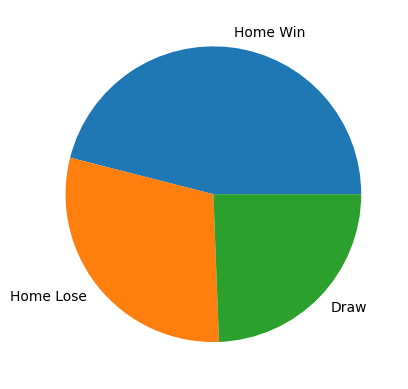

In [10]:
# display the count number of wins/draws/loses at full time
plt.pie(df6['FT_Result'].value_counts(normalize=True),labels=['Home Win','Home Lose', 'Draw'])
plt.show()


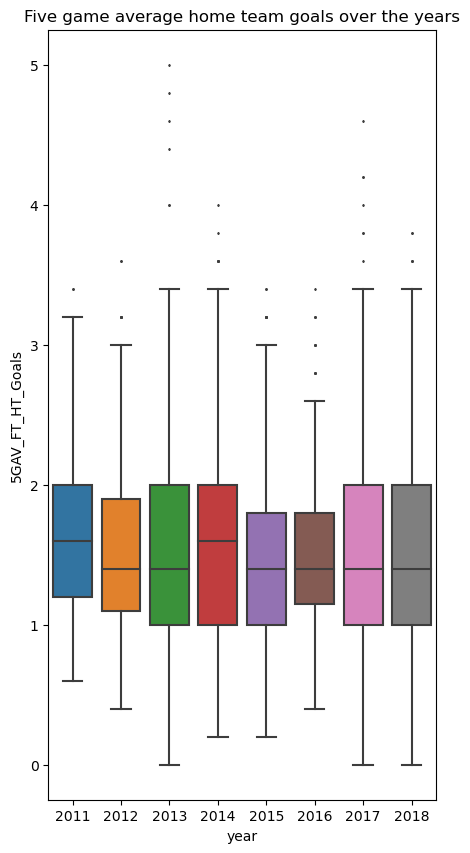

In [11]:
# display the difference in amount of goals scored over the years found in the dataset
plt.figure(figsize=(5,10))
p = sns.boxplot(y=df6['5GAV_FT_HT_Goals'],x=df6['year'] , fliersize=1)
plt.title('Five game average home team goals over the years')
plt.show()

- it appears that the full time goals scored over the years are reasonably similar which is positive in light to the data being transferable of more recent years. 
- further analysis would be useful to confirm this but my access to free data is limited.

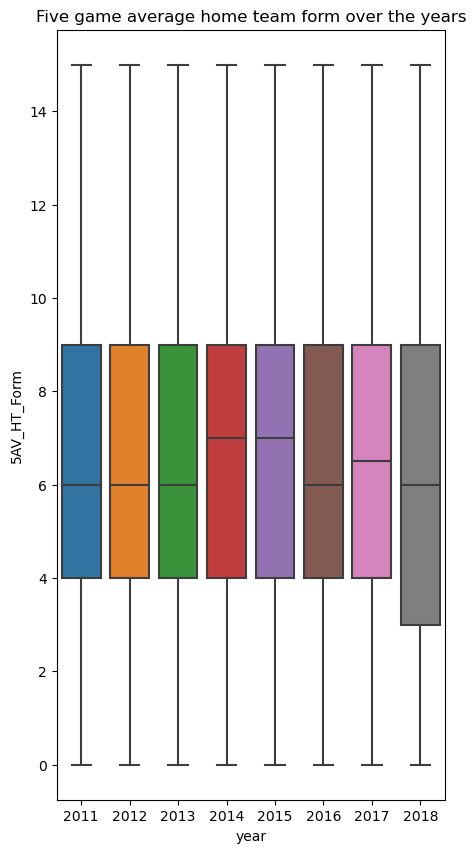

In [12]:
# display the difference in ability for teams to maintain strong winning streaks over the years
plt.figure(figsize=(5,10))
p = sns.boxplot(y=df6['5AV_HT_Form'],x=df6['year'] , fliersize=1)
plt.title('Five game average home team form over the years')
plt.show()

- This bloxplot also suggests that the statistics of different aspects of football remain fairly similar over the years. 
- The means all range around 6 points gathered in the previous 5 games. 
- The lower bound of the last boxplot show that some home teams obtain lower average scores in their previous 5 games compared to other years. This could be because smaller teams find it harder to perform to the standard of the premier league but more analysis into why this occurs would be useful
- for the purpose of modeling this does not appear to be significant.

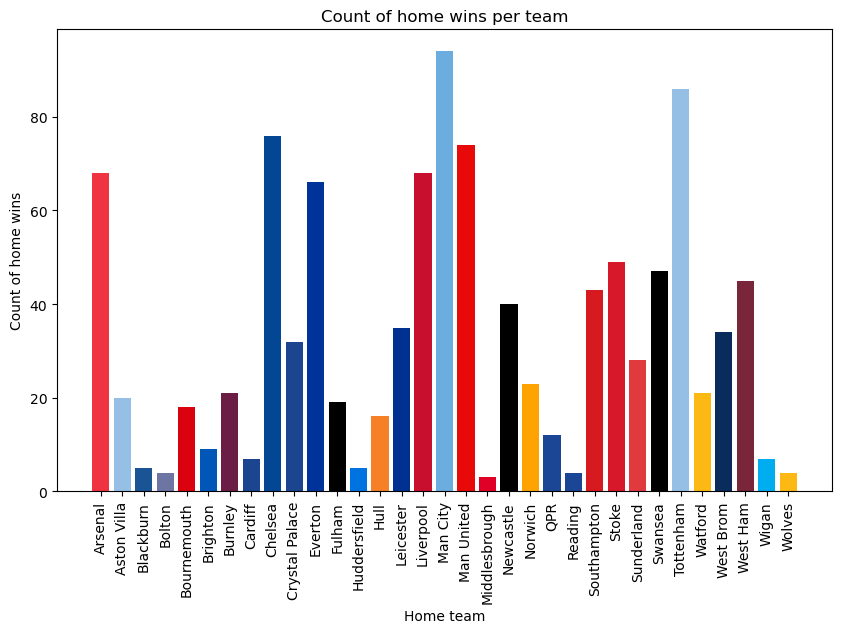

In [13]:
# display the home team wins by team


#setting each team to their team colour for visualisation
team_color = ('#EF3340', '#95BFE5', '#1B5495', '#6D75A3','#DA020E', '#0057B8', '#6C1D45', 
               '#1B458F', '#034694', '#1B458F', '#003399', '#000000', '#0073E0', '#F58025', '#003090', '#C8102E',
               '#6CADDF', '#E80909', '#E00027', '#000000', '#FFA300', '#1B4595', '#1B4595', '#D71920', '#D7182A', 
               '#E03A3E', '#000000', '#95BFE5', '#FDB913', '#092C5C', '#7A263A', '#00ADEF', '#FDB913')


count_data = df6[df6['FT_Result'] == 'H'].groupby('hometeam').size().reset_index(name='home_wins')


# Set the size of the figure
plt.figure(figsize=(10, 6))

# Plot the bar chart
plt.bar(count_data['hometeam'], count_data['home_wins'], color=team_color)

# Rotate x-labels vertically
plt.xticks(rotation='vertical')

# Set labels and title
plt.xlabel('Home team')
plt.ylabel('Count of home wins')
plt.title('Count of home wins per team')

# Show the plot
plt.show()

- This graph better displays how each team performs at home.
- This graph clearly shows that their are teams that are more dominant than others at home such as Man City and Tottenham. 
- It could be interesting to later produce a model that predicts home wins for the top performing home teams only, to see if the model produces better scores overall than a model that uses all the teams in the premier league.

In [16]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2353 entries, 0 to 2352
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   hometeam              2353 non-null   object 
 1   awayteam              2353 non-null   object 
 2   FT_Result             2353 non-null   object 
 3   referee               2353 non-null   object 
 4   HT_Yellows            2353 non-null   float64
 5   AT_Yellows            2353 non-null   float64
 6   HT_Reds               2353 non-null   float64
 7   AT_Reds               2353 non-null   float64
 8   HT_W_Odds             2353 non-null   float64
 9   Draw_Odds             2353 non-null   float64
 10  AT_W_Odds             2353 non-null   float64
 11  Date                  2353 non-null   object 
 12  5GAV_FT_HT_Goals      2353 non-null   float64
 13  5GAV_FT_AT_Goals      2353 non-null   float64
 14  5GAV_HT_HT_Goals      2353 non-null   float64
 15  5GAV_HT_AT_Goals     

In [18]:
# remove unwanted columns for modeling 

columns_to_remove = ['hometeam', 'awayteam', 'referee', 'HT_Yellows', 'AT_Yellows', 'HT_Reds', 'AT_Reds', 'Date', 'Total_Yellow',
                    'Total_Reds']
modeling_data = df6.drop(columns_to_remove, axis=1)

In [19]:
modeling_data.head(3)

,FT_Result,HT_W_Odds,Draw_Odds,AT_W_Odds,5GAV_FT_HT_Goals,5GAV_FT_AT_Goals,5GAV_HT_HT_Goals,5GAV_HT_AT_Goals,5GAV_HT_Shots,5GAV_AT_Shots,...,5GAV_AT_Fouls_Comm,5GAV_HT_Corners,5GAV_AT_Corners,5GAV_HT_Yellows,5GAV_AT_Yellows,5GAV_HT_Reds,5GAV_AT_Reds,5AV_HT_Form,5AV_AT_Form,year
0,H,1.40,4.5,8.5,1.8,0.8,0.6,0.4,16.0,7.8,...,10.8,8.2,3.0,1.6,2.0,0.2,0.2,9,8,2011
1,D,1.44,4.2,8.0,2.4,0.4,1.0,0.4,16.4,7.0,...,12.0,7.2,2.2,1.2,1.6,0.0,0.2,12,6,2011
2,H,1.53,4.0,6.5,2.4,0.6,0.8,0.4,16.8,7.0,...,12.0,9.0,2.0,0.8,1.8,0.0,0.2,13,6,2011


In [20]:
# changing the full time result to binary as close to 50% of home results were a win and the other 50% were either a draw or a win
#changing the FT_Result column to show only H or NH. H will represent a home win and NH will represent a draw or away win.

# Create a new column based on the conditions
modeling_data['FT_Result'] = modeling_data['FT_Result'].apply(lambda x: x if x == 'H' else 'NH')


In [23]:
modeling_data['FT_Result'].value_counts(normalize=True)

NH    0.539737
H     0.460263
Name: FT_Result, dtype: float64

C:\Users\liamf\AppData\Local\Temp\ipykernel_15904\523221601.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(modeling_data.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))


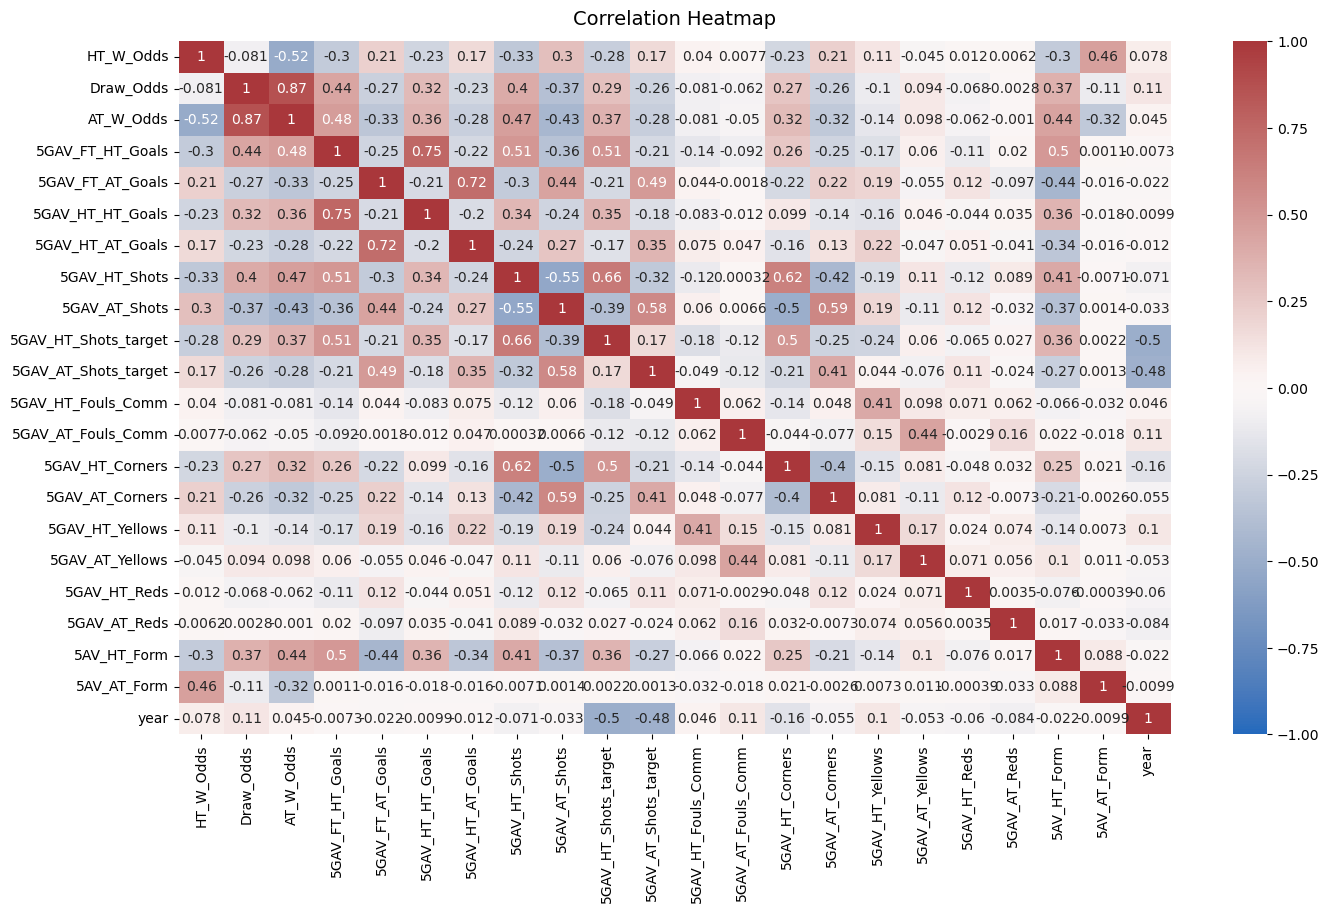

In [24]:
# correlation matrix of all the data
# Plot a correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(modeling_data.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

- the highly correlated columns above 0.6 will be removed to prevent collinearity

In [26]:
#removing columns that are highly correlated

columns_to_remove = ['Draw_Odds', '5GAV_HT_HT_Goals', '5GAV_HT_AT_Goals', '5GAV_HT_Shots', '5GAV_AT_Shots']
modeling_data = modeling_data.drop(columns_to_remove, axis=1)


In [27]:
modeling_data.to_csv(r"C:\Users\liamf\Desktop\data analytics\python\football_odds\modeling_data.csv")

In [3]:
modeling_data = pd.read_csv(r"C:\Users\liamf\Desktop\data analytics\python\football_odds\modeling_data.csv")

In [4]:
columns_to_remove = ['5GAV_HT_Fouls_Comm', '5GAV_AT_Fouls_Comm', '5GAV_HT_Reds', '5GAV_AT_Reds']
modeling_data = modeling_data.drop(columns_to_remove, axis=1)

In [6]:
modeling_data.head(3)

,Unnamed: 0,FT_Result,HT_W_Odds,AT_W_Odds,5GAV_FT_HT_Goals,5GAV_FT_AT_Goals,5GAV_HT_Shots_target,5GAV_AT_Shots_target,5GAV_HT_Corners,5GAV_AT_Corners,5GAV_HT_Yellows,5GAV_AT_Yellows,5AV_HT_Form,5AV_AT_Form,year
0,0,H,1.40,8.5,1.8,0.8,8.8,4.4,8.2,3.0,1.6,2.0,9,8,2011
1,1,NH,1.44,8.0,2.4,0.4,9.0,3.6,7.2,2.2,1.2,1.6,12,6,2011
2,2,H,1.53,6.5,2.4,0.6,9.8,3.8,9.0,2.0,0.8,1.8,13,6,2011


In [7]:
#removing unwanted columns
columns_to_remove = ['Unnamed: 0']
modeling_data = modeling_data.drop(columns_to_remove, axis=1)

In [8]:
modeling_data.head(2)

,FT_Result,HT_W_Odds,AT_W_Odds,5GAV_FT_HT_Goals,5GAV_FT_AT_Goals,5GAV_HT_Shots_target,5GAV_AT_Shots_target,5GAV_HT_Corners,5GAV_AT_Corners,5GAV_HT_Yellows,5GAV_AT_Yellows,5AV_HT_Form,5AV_AT_Form,year
0,H,1.40,8.5,1.8,0.8,8.8,4.4,8.2,3.0,1.6,2.0,9,8,2011
1,NH,1.44,8.0,2.4,0.4,9.0,3.6,7.2,2.2,1.2,1.6,12,6,2011


## Modeling

In [9]:
# changing the H and NH to 1 and 0 for modeling with the where function

modeling_data['FT_Result'] = np.where(modeling_data['FT_Result'] == 'H', 1, 0)

In [10]:
modeling_data.head(3)

,FT_Result,HT_W_Odds,AT_W_Odds,5GAV_FT_HT_Goals,5GAV_FT_AT_Goals,5GAV_HT_Shots_target,5GAV_AT_Shots_target,5GAV_HT_Corners,5GAV_AT_Corners,5GAV_HT_Yellows,5GAV_AT_Yellows,5AV_HT_Form,5AV_AT_Form,year
0,1,1.40,8.5,1.8,0.8,8.8,4.4,8.2,3.0,1.6,2.0,9,8,2011
1,0,1.44,8.0,2.4,0.4,9.0,3.6,7.2,2.2,1.2,1.6,12,6,2011
2,1,1.53,6.5,2.4,0.6,9.8,3.8,9.0,2.0,0.8,1.8,13,6,2011


In [11]:
modeling_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2353 entries, 0 to 2352
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   FT_Result             2353 non-null   int32  
 1   HT_W_Odds             2353 non-null   float64
 2   AT_W_Odds             2353 non-null   float64
 3   5GAV_FT_HT_Goals      2353 non-null   float64
 4   5GAV_FT_AT_Goals      2353 non-null   float64
 5   5GAV_HT_Shots_target  2353 non-null   float64
 6   5GAV_AT_Shots_target  2353 non-null   float64
 7   5GAV_HT_Corners       2353 non-null   float64
 8   5GAV_AT_Corners       2353 non-null   float64
 9   5GAV_HT_Yellows       2353 non-null   float64
 10  5GAV_AT_Yellows       2353 non-null   float64
 11  5AV_HT_Form           2353 non-null   int64  
 12  5AV_AT_Form           2353 non-null   int64  
 13  year                  2353 non-null   int64  
dtypes: float64(10), int32(1), int64(3)
memory usage: 248.3 KB


In [12]:
#double checking the dataset for duplicates

modeling_data.duplicated().sum()

0

In [13]:
#saving the dataset for later ease of use
modeling_data.to_csv(r"C:\Users\liamf\Desktop\data analytics\python\football_odds\final_data_for_model.csv")

In [13]:
modeling_data = pd.read_csv(r"C:\Users\liamf\Desktop\data analytics\python\football_odds\final_data_for_model.csv")

Model building

In [14]:
# Isolate the outcome variable
y = modeling_data['FT_Result']

# Display the first few rows of `y`
y.head()

0    1
1    0
2    1
3    0
4    1
Name: FT_Result, dtype: int64

In [15]:
# Select the features
X = modeling_data.drop('FT_Result', axis=1)

# Display the first few rows of `X`
X.head()

,Unnamed: 0,HT_W_Odds,AT_W_Odds,5GAV_FT_HT_Goals,5GAV_FT_AT_Goals,5GAV_HT_Shots_target,5GAV_AT_Shots_target,5GAV_HT_Corners,5GAV_AT_Corners,5GAV_HT_Yellows,5GAV_AT_Yellows,5AV_HT_Form,5AV_AT_Form,year
0,0,1.40,8.5,1.8,0.8,8.8,4.4,8.2,3.0,1.6,2.0,9,8,2011
1,1,1.44,8.0,2.4,0.4,9.0,3.6,7.2,2.2,1.2,1.6,12,6,2011
2,2,1.53,6.5,2.4,0.6,9.8,3.8,9.0,2.0,0.8,1.8,13,6,2011
3,3,1.22,15.0,2.0,0.6,8.4,3.4,8.6,2.4,1.2,2.0,10,4,2011
4,4,1.25,13.0,1.8,0.6,9.6,3.4,9.4,2.6,1.0,2.0,10,2,2011


In [16]:
columns_to_remove = ['Unnamed: 0']
modeling_data = modeling_data.drop(columns_to_remove, axis=1)

In [17]:
# Splitting the data to obtain a 80/10/10 split for training testing and validation sets

# Splitting the initial data into 80/20 split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the remaining data (20%) into validation (10%) and test (10%) sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the sizes of the sets
print(f"Training set size: {len(X_train)} rows")
print(f"Validation set size: {len(X_val)} rows")
print(f"Test set size: {len(X_test)} rows")

Training set size: 1882 rows
Validation set size: 235 rows
Test set size: 236 rows


In [24]:
# Cross-validated hyperparameter tuning
# we will refit the model for precision as to obtain as many accurate home win predictions and prevent as many false positives

xgb = XGBClassifier(objective='binary:logistic', random_state=0) 

cv_params = {'max_depth': [1,2,3,4,5,6,7,8], 
             'min_child_weight': [1,2,3,4,5],
             'learning_rate': [0.1, 0.2, 0.3],
             'n_estimators': [50, 100, 125, 150, 200]
             }    

scoring = 'precision'

xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='precision')

In [25]:
%%time
xgb_cv.fit(X_train, y_train)

CPU times: total: 36min 36s
Wall time: 11min 38s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_child_weight': [1, 2, 3, 4, 5],
                         'n_estimators': [50, 100, 125, 150, 200]},
             refit='precision', scoring='precision')

In [20]:
# We'll pickle the model so we don't have to refit it every time we run this notebook
path = r"C:\Users\liamf\Desktop\data analytics\python\football_odds/"

# To save the model once fit
import pickle

In [21]:
# Pickle the model
with open(path + 'xgb_cv_model.pickle', 'wb') as to_write:
    pickle.dump(xgb_cv, to_write) 

In [22]:
# Open pickled model
with open(path+'xgb_cv_model.pickle', 'rb') as to_read:
    xgb_cv = pickle.load(to_read)

In [26]:
# check the model's score 

print('F1 score XGB CV: ', xgb_cv.best_score_)

F1 score XGB CV:  0.6601543910392837


In [27]:
# Examine best parameters
xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 1,
 'min_child_weight': 1,
 'n_estimators': 50}

In [28]:
# obtaining the model scores with validaiton set
xgb_val_preds = xgb_cv.best_estimator_.predict(X_val)
print('F1 score final XGB model: ', f1_score(y_val, xgb_val_preds))
print('Recall score final XGB model: ', recall_score(y_val, xgb_val_preds))
print('Precision score final XGB model: ', precision_score(y_val, xgb_val_preds))
print('Accuracy score final XGB model: ', accuracy_score(y_val, xgb_val_preds))

F1 score final XGB model:  0.6434782608695653
Recall score final XGB model:  0.6065573770491803
Precision score final XGB model:  0.6851851851851852
Accuracy score final XGB model:  0.6510638297872341


- The model obtained a 70% precision score (to the nearest whole number) on the validation set. 
- The validation set was useful to decide whether there is a need to fine-tune the models hyperparameters and to prevent overfitting. The precision score of 69% is just under the goal of 70% thus no further finetuning will be conducted on the model.

In [29]:
# obtaining the model scores with validaiton set
xgb_test_preds = xgb_cv.best_estimator_.predict(X_test)
print('F1 score final XGB model: ', f1_score(y_test, xgb_test_preds))
print('Recall score final XGB model: ', recall_score(y_test, xgb_test_preds))
print('Precision score final XGB model: ', precision_score(y_test, xgb_test_preds))
print('Accuracy score final XGB model: ', accuracy_score(y_test, xgb_test_preds))

F1 score final XGB model:  0.625
Recall score final XGB model:  0.5660377358490566
Precision score final XGB model:  0.6976744186046512
Accuracy score final XGB model:  0.6949152542372882


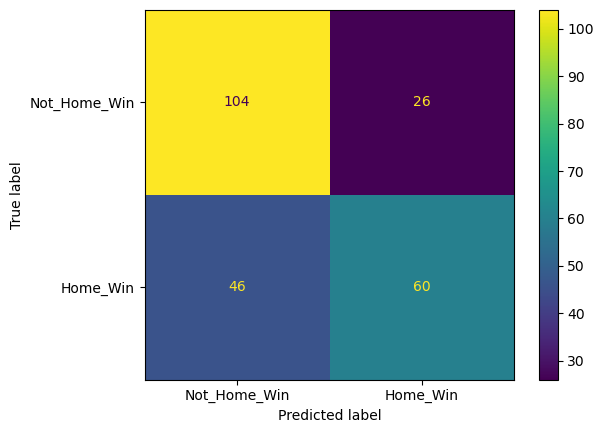

In [30]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, xgb_test_preds, labels=xgb_cv.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=['Not_Home_Win', 'Home_Win'])
disp.plot();

- The model was able to predict 60 home win matches that were actually home wins. 
- The model wrongly predicted 26 games as home wins when they were actually not home wins

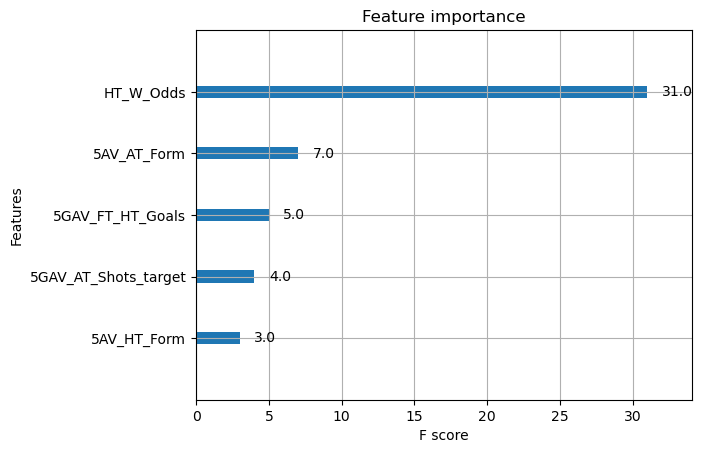

In [31]:
plot_importance(xgb_cv.best_estimator_);

- This is an important visualisation that shows that the dominant predictor of whether a home team wins is the odds that the bookmakers have the home team winning at
- The second most important feature is the away team form. This is interesting because the away teams current form weighed (last 5 games) more in importance in predicting whether a home team wins than the home teams current form. 
- The three following features in terms of importance of predicting whether a home team won were the 5 previous game average goals for the home team, the 5 previous game average shots on target for the home team followed by the 5 previous game average home team form in that order.